# Chicago insurance redlining data analysis

* In a study of insurance availability in Chicago, the U.S. Commission on Civil Rights attempted to examine charges by several community organizations that insurance companies were redlining their neighbourhoods, i.e. cancelling policies, refusing to insure or to renew, etc. Data were obtained from a variety of sources. First, the Illinois Department of Insurance provided the number of cancellations, nonrenewals, new policies, and renewals of homeowners and residential fire insurance policies by ZIP code for the months of December 1977 through February 1978. The companies that provided this information to the Department account for more than 70 percent of the homeowners insurance policies written in the city of Chicago. The Department also supplied the number of FAIR Plan policies written and renewed in Chicago, by ZIP code, for the months of December 1977 through May 1978. Since most FAIR Plan policyholders secure such coverage only after they have been rejected by the voluntary market, rather than as a result of a preference for that type of insurance, the distribution of FAIR Plan policies is another measure of insurance availability in the voluntary market.
* Secondly, the Chicago Police Department provided crime data, by beat, on all thefts for the year 1975. Most Insurance companies claim to base their underwriting activities on loss data from the preceding years, i.e. a 2-3 year lag seems reasonable for analysis purposes. the Chicago Fire Department provided similar data on fires occurring during 1975. These fire and theft data were organized by zip code.
* Finally the US Bureau of the census supplied data on racial composition, income and age and value of residential units for each ZIP code in Chicago. To adjust for these differences in the populations size associated with different ZIP code areas, the theft data were expressed as incidents per 1,000 population and the fire and insurance data as incidents per 100 housing units.
* The variables are
    - race:     racial composition in percent minority
    - fire:     fires per 100 housing units
    - theft:    theft per 1000 population
    - age:      percent of housing units built before 1939
    - volact:   new homeowner policies plus renewals minus cancellations and non renewals per 100 housing units
    - involact: new FAIR plan policies and renewals per 100 housing units
    - income:   median family income.

## Objective :
- Here our objective is to validate the claim made by several community organisations that insurance companies were redlining their neighbourhoods.

In [54]:
# Necessary packages
library('carData')
library('car')
library('trafo')
library('datasets')
library('olsrr')
library('repr')
library('faraway')

## Let's first have a look at the data

In [55]:
data(chicago)
data <- data.frame(chicago[,])
#data = read.table('chicago.data')
print(head(data))

      race fire theft  age volact involact income
60626 10.0  6.2    29 60.4    5.3      0.0  11744
60640 22.2  9.5    44 76.5    3.1      0.1   9323
60613 19.6 10.5    36 73.5    4.8      1.2   9948
60657 17.3  7.7    37 66.9    5.7      0.5  10656
60614 24.5  8.6    53 81.4    5.9      0.7   9730
60610 54.0 34.1    68 52.6    4.0      0.3   8231


*As the 'Income' column consists of large values in compared to other columns, we take log - of income*

In [4]:
data$income = log(data$income) 
summary(data)

      race            fire           theft             age       
 Min.   : 1.00   Min.   : 2.00   Min.   :  3.00   Min.   : 2.00  
 1st Qu.: 3.75   1st Qu.: 5.65   1st Qu.: 22.00   1st Qu.:48.60  
 Median :24.50   Median :10.40   Median : 29.00   Median :65.00  
 Mean   :34.99   Mean   :12.28   Mean   : 32.36   Mean   :60.33  
 3rd Qu.:57.65   3rd Qu.:16.05   3rd Qu.: 38.00   3rd Qu.:77.30  
 Max.   :99.70   Max.   :39.70   Max.   :147.00   Max.   :90.10  
     volact         involact          income     
 Min.   : 0.50   Min.   :0.0000   Min.   :8.627  
 1st Qu.: 3.10   1st Qu.:0.0000   1st Qu.:9.041  
 Median : 5.90   Median :0.4000   Median :9.277  
 Mean   : 6.53   Mean   :0.6149   Mean   :9.247  
 3rd Qu.: 9.65   3rd Qu.:0.9000   3rd Qu.:9.392  
 Max.   :14.30   Max.   :2.2000   Max.   :9.975  

##  Graphical representation of the data

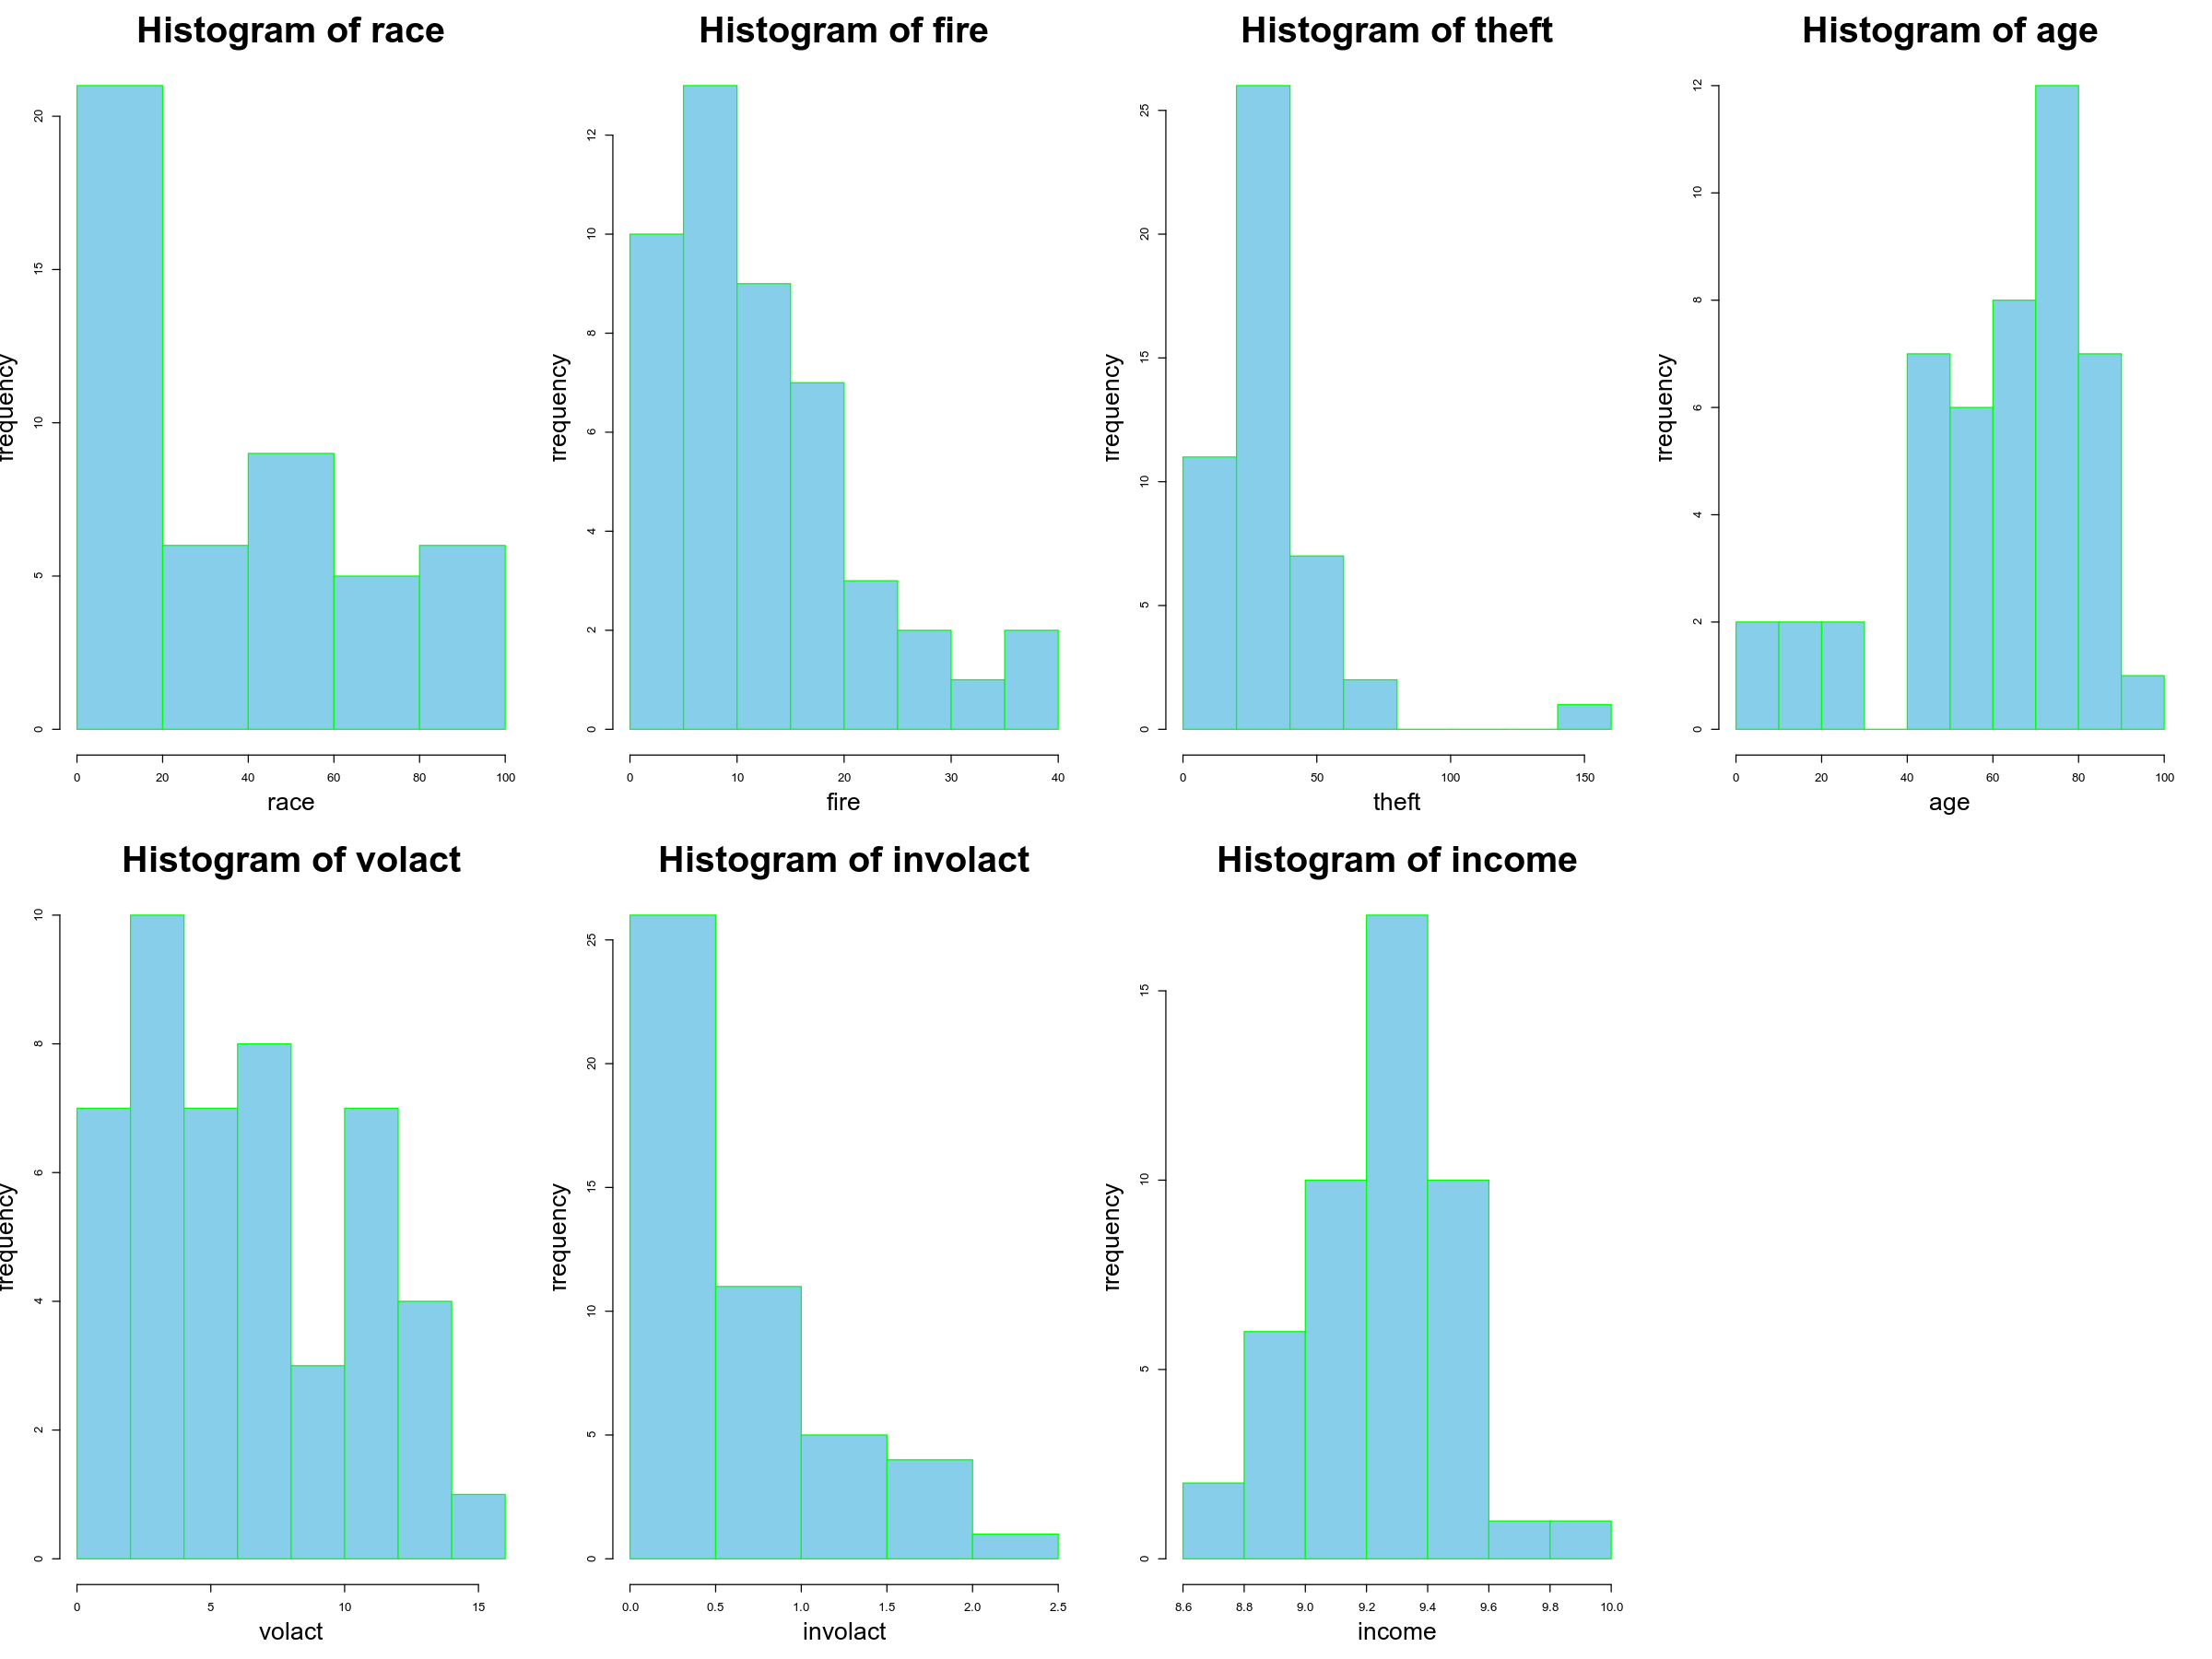

In [5]:
options(repr.plot.width=20, repr.plot.height=15)

par(mfrow = c(2,4))
for(i in 1:7){
    hist(data[,i],xlab = list(names(data)[i] ,cex = 2), ylab = list('frequency' , cex = 2) , main = '',col = 'sky blue',border = 'green')
    title(main = list(paste('Histogram of',names(data)[i]), cex = 3,
                  col = "black"))
    }


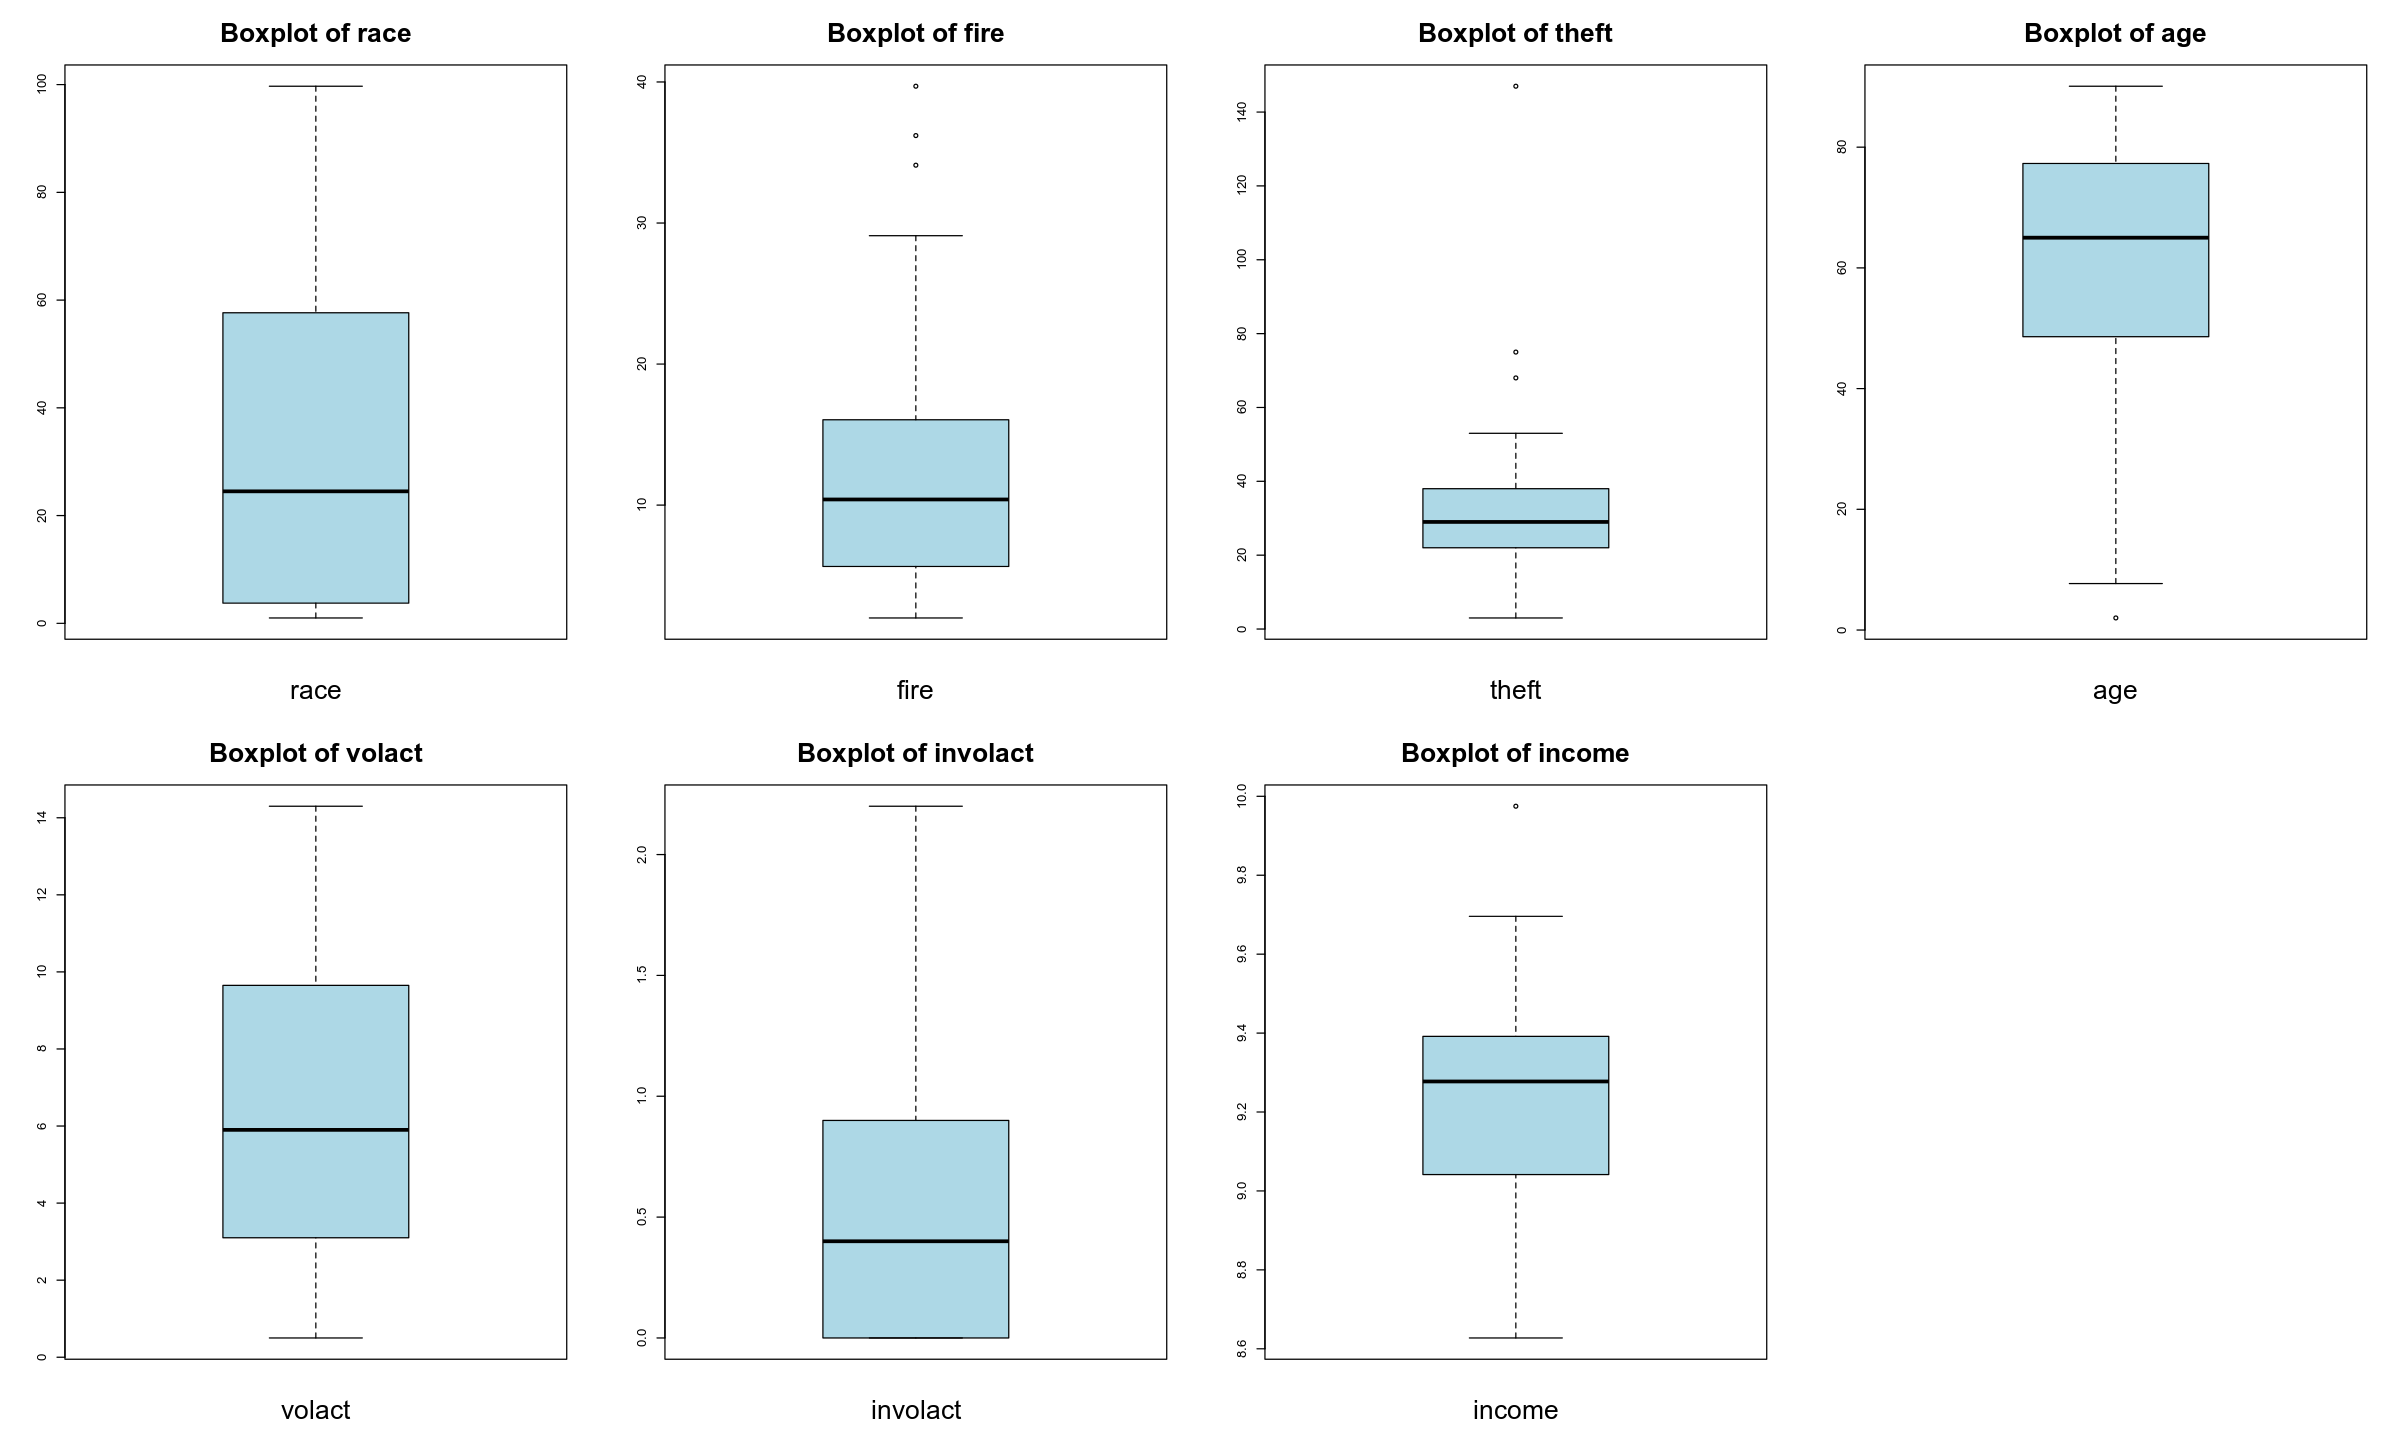

In [6]:
options(repr.plot.width=20, repr.plot.height=12)
par(mfrow = c(2,4))
for(i in 1:7){
    boxplot(data[,i],xlab = list(names(data)[i] ,cex = 2) , main = '',col = 'light blue',border = c(1))
    title(main = list(paste('Boxplot of',names(data)[i]), cex = 2,
                  col = "black"))
    }

#boxplot(data , col = c(15,60,170,90,100) , names = names(data))

* The data seems to have outliers corresponding to **fire**,**age**,**theft** and **income** variables.

* **Here we conduct the study in two parts**-
    - For the first part we conduct the anlysis using a subset of the data taking 'Involact' as the response variable.Since ,this seems to be the best measure of those who are denied insurance by others and for this part we exclude the voluntary market activity variable('Volact') as this is complementory measure to the 'Involact' variable.Although 'Involact' is not a perfect measure because some who are denied insurance may give up and others still may not try at all for that reason. 
    - For the second part we conduct the analysis using a another subset of the data taking 'Volact' as response variable
      .Since it is the best measure for those whose new insuarance and renewals are accepted.And here we exclude 'Involact' variable.

# Analysis

# 1. First part

## 1.1 Preliminary model fitting

In [7]:
# check for significance of regression
data_involact = subset(data,select = -volact)
model1 = lm(involact~. , data = data_involact)
summary(model1)


Call:
lm(formula = involact ~ ., data = data_involact)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.85393 -0.16922 -0.03088  0.17890  0.81228 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.573976   3.857292  -0.927 0.359582    
race         0.009502   0.002490   3.817 0.000449 ***
fire         0.039856   0.008766   4.547 4.76e-05 ***
theft       -0.010295   0.002818  -3.653 0.000728 ***
age          0.008336   0.002744   3.038 0.004134 ** 
income       0.345762   0.400123   0.864 0.392540    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3345 on 41 degrees of freedom
Multiple R-squared:  0.7517,	Adjusted R-squared:  0.7214 
F-statistic: 24.83 on 5 and 41 DF,  p-value: 2.009e-11


* From the above summary we can observe that the **p-value: 2.159e-11**. Since it less than 0.05 we can colnclude at 5% level of significance that the fitted linear regression model is significant.
* The model explains 72% of the total variation in the data. The performance of the model in explaining the variation in the data in satisfactory. 

## 1.2 Leverage point detection

### Let's now investigate if there is any leverage point in the data.

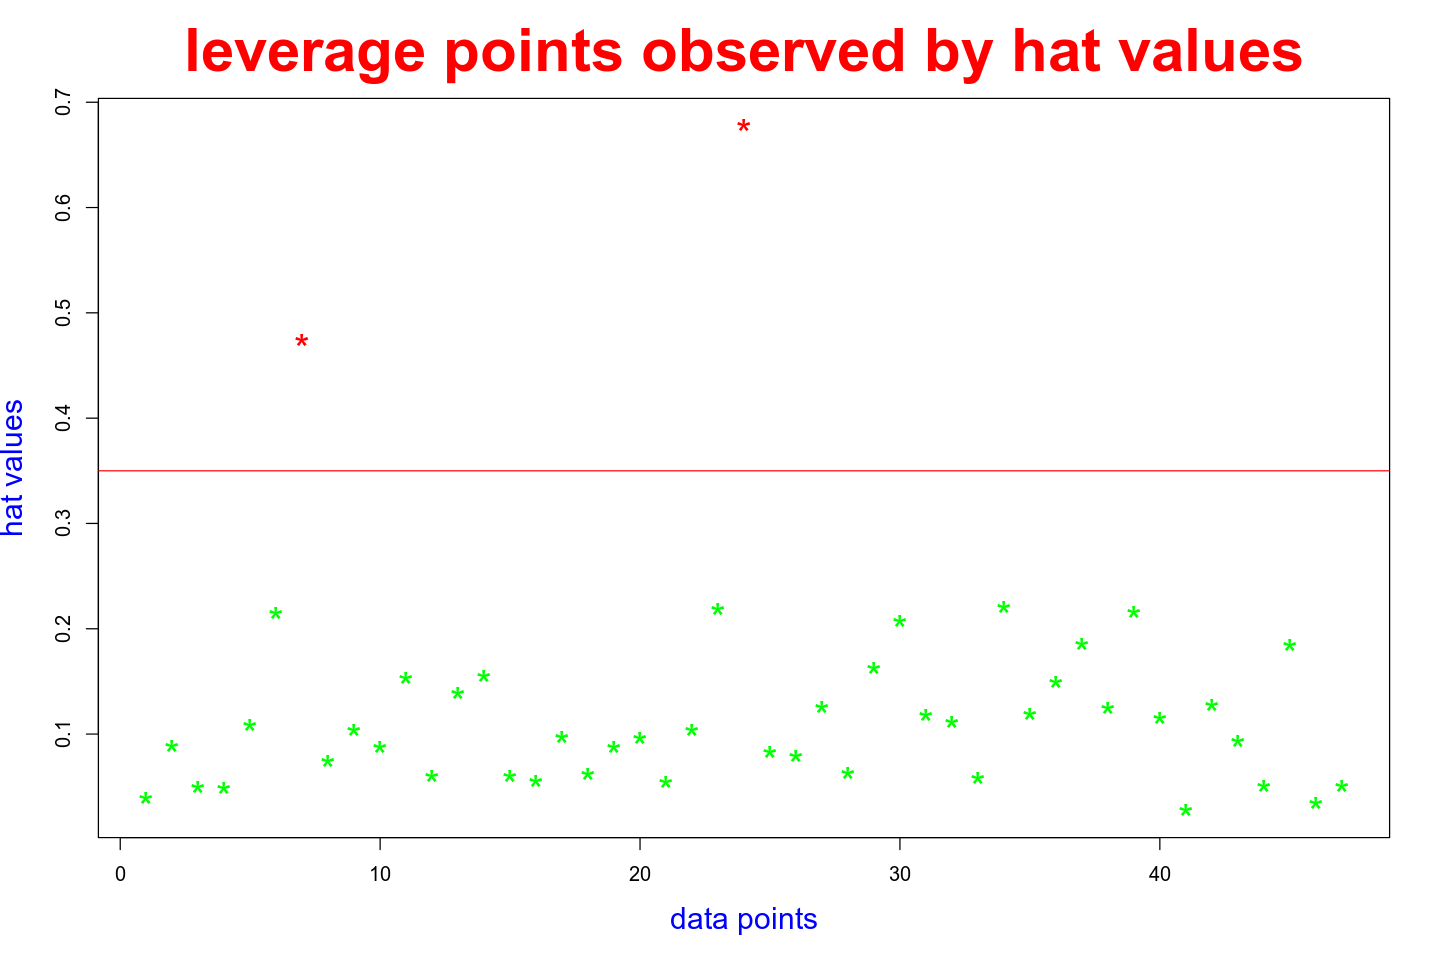

In [8]:
options(repr.plot.width= 12, repr.plot.height= 8)
hat = hatvalues(model1)
plot(hat, col = ifelse(hat > 0.35,"red","green") , pch = "*" , cex = 2, xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("hat values",cex=1.5,col="blue"))
title(main='leverage points observed by hat values',cex.main=3,col.main="red")
abline(h = 0.35,col = 'red')

* It seems that there are two potential leverage points present in the data.

In [9]:
# leverage points
leverage_points = which(hat > 0.35)
data_lev = data_involact[-leverage_points,]
# number of leverage points detected
length(leverage_points)

[1] 2

* The number of leverage points : 2

### Checking whether the model improves or not after eliminating the leverage points.

In [10]:
model2<-lm(involact~ .,data = data_lev) 
summary(model2)


Call:
lm(formula = involact ~ ., data = data_lev)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67748 -0.19347 -0.03209  0.18707  0.78288 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.187915   4.861077  -0.656 0.515800    
race         0.010115   0.002820   3.586 0.000923 ***
fire         0.038150   0.009196   4.149 0.000175 ***
theft       -0.014068   0.004791  -2.936 0.005545 ** 
age          0.009014   0.002932   3.074 0.003841 ** 
income       0.310656   0.505910   0.614 0.542745    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3388 on 39 degrees of freedom
Multiple R-squared:  0.7515,	Adjusted R-squared:  0.7196 
F-statistic: 23.59 on 5 and 39 DF,  p-value: 7.679e-11


* Since adjusted R-squared value is not improved we will not delete leverage points. 

## 1.3 Influential point detection

### We will now check for the influential points present in the data using Cook'S Distance, Covratio , DFFIT.

In [11]:
ckd = cooks.distance(model1)
cvratio = covratio(model1)
dffit  = dffits(model1)

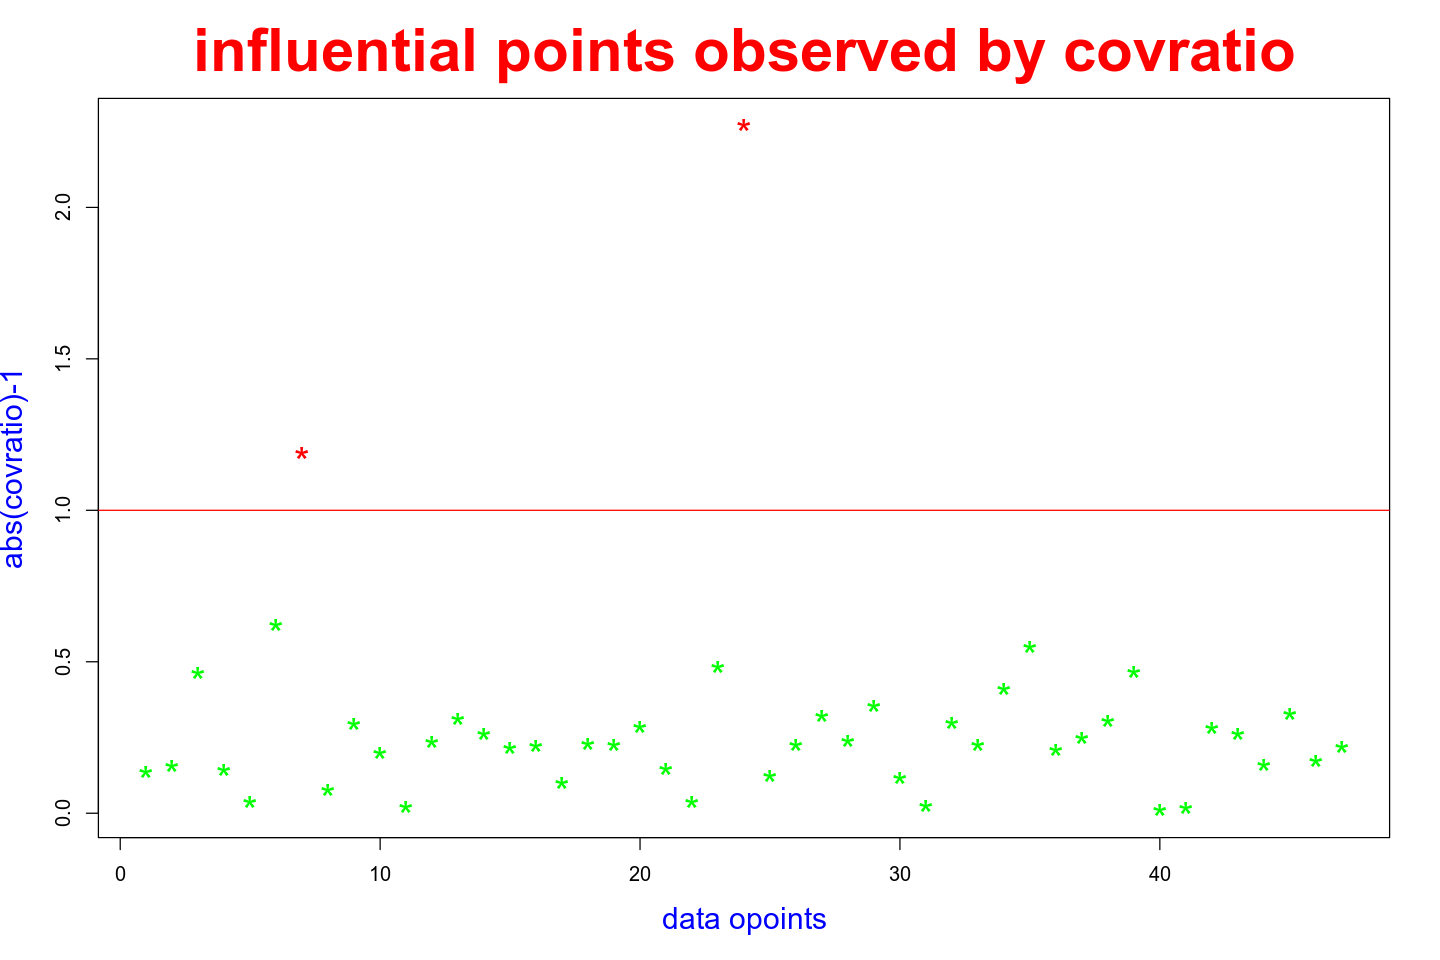

In [12]:
# plot of covratio
plot(abs(cvratio-1), pch="*", cex=2,col = ifelse(abs(cvratio -1) > 1,"red","green"),
    xlab=list("data opoints",cex=1.5,col="blue"), 
    ylab=list("abs(covratio)-1",cex=1.5,col="blue"))  # plot covratio
title(main='influential points observed by covratio',cex.main=3,col.main="red")
abline(h = 1 , col="red")  # add cutoff line

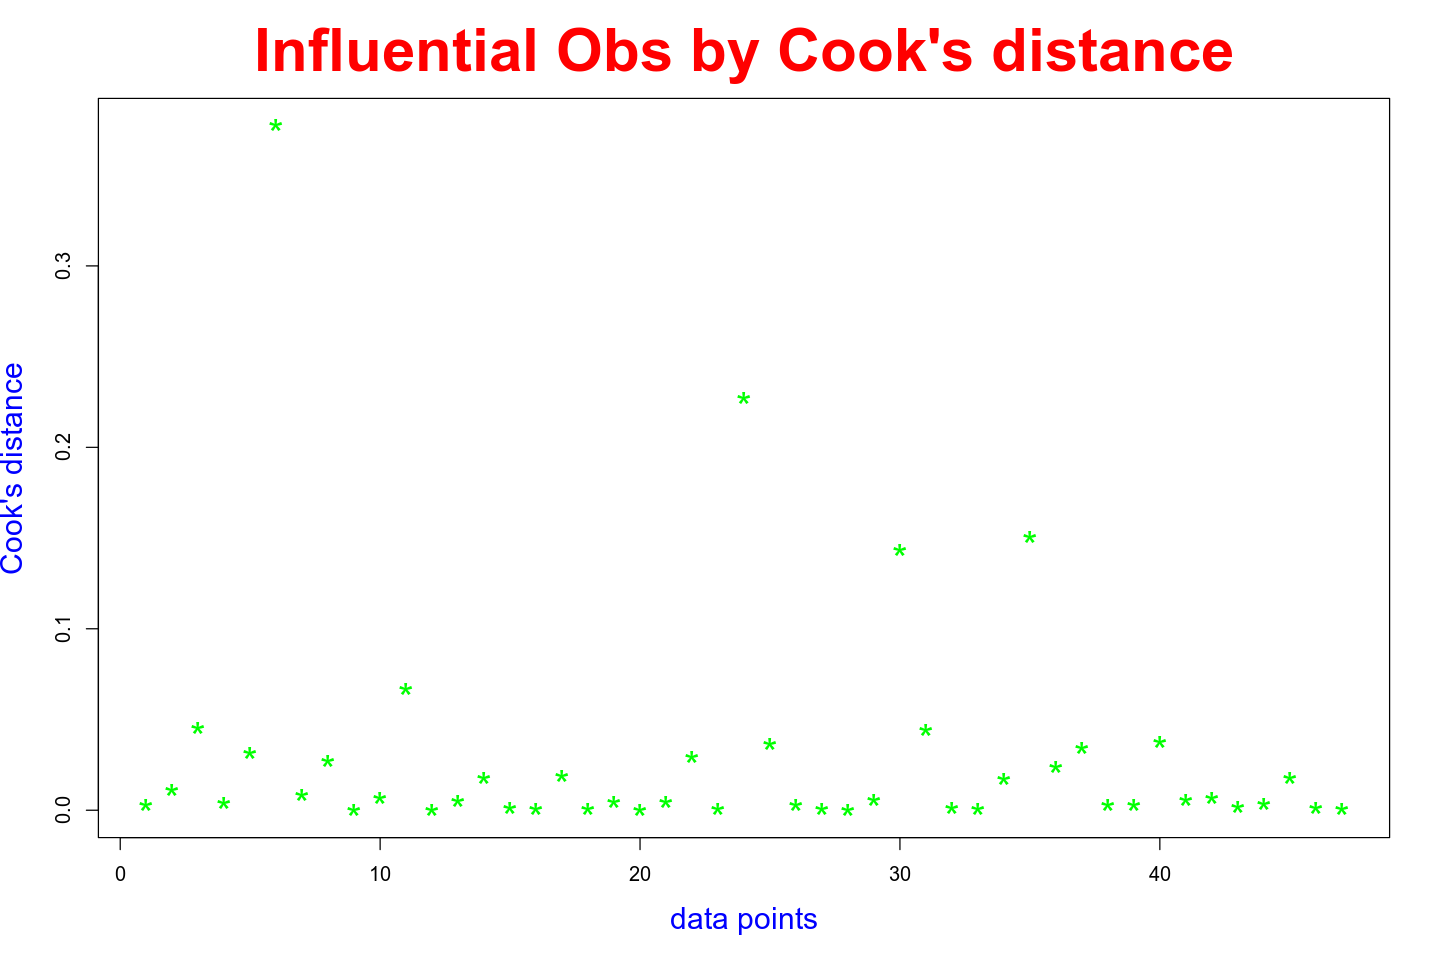

In [13]:
plot(ckd, pch="*", cex=2,col = ifelse(ckd > 0.4,"red","green"), 
    xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("Cook's distance",cex=1.5,col="blue"))
title("Influential Obs by Cook's distance",cex.main=3,col.main="red")  # plot cook's distance
abline(h = 0.4 , col="red")  # add cutoff line

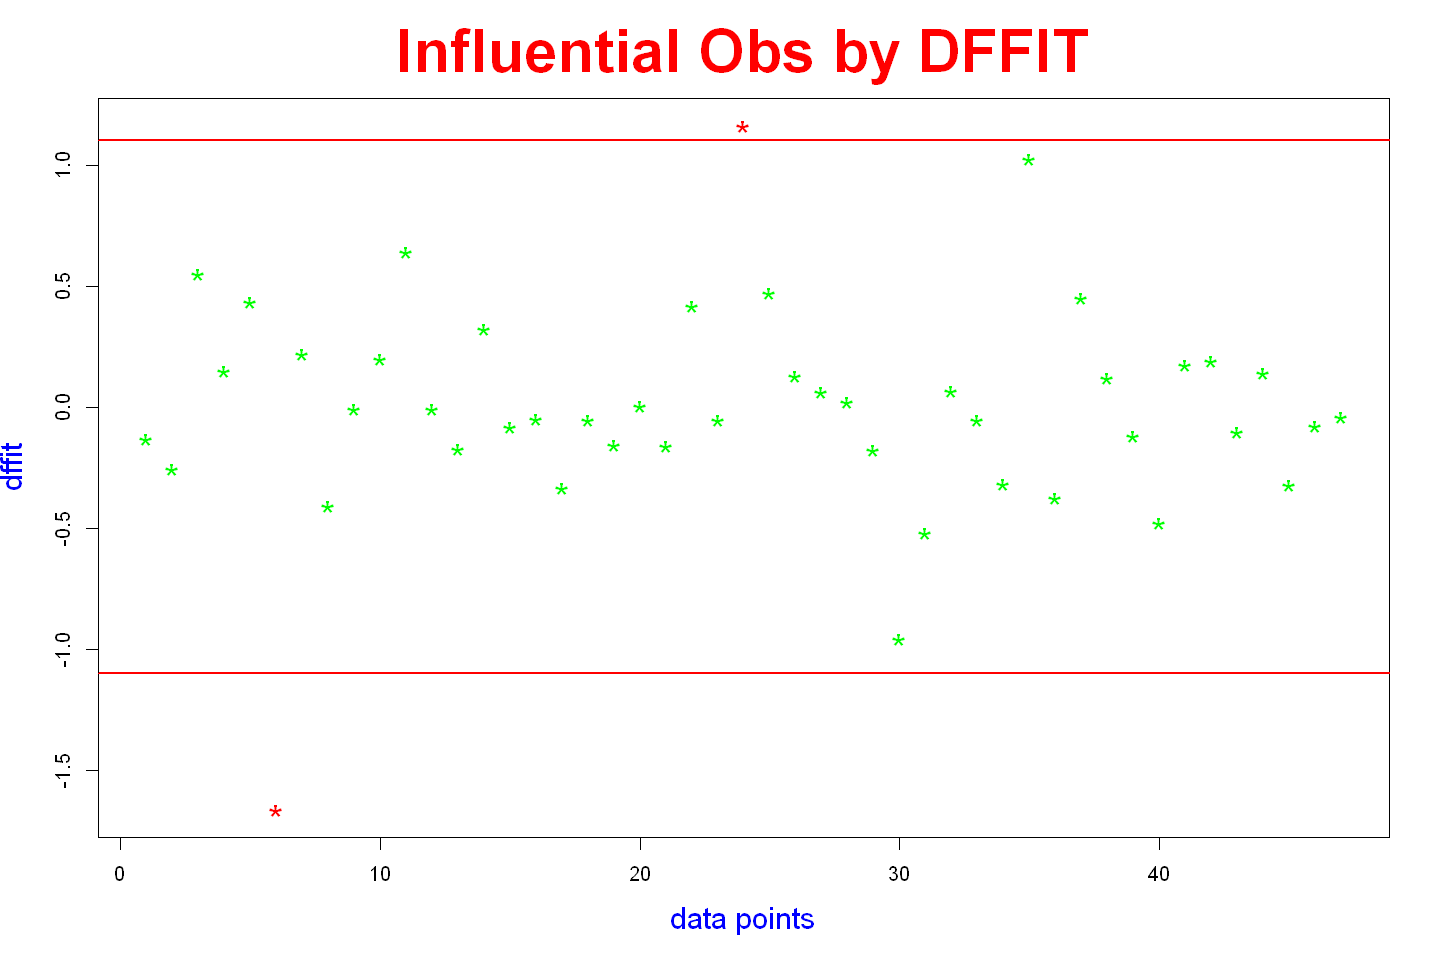

In [13]:
# plot of dffit values
plot(dffit, pch="*", cex=2,col = ifelse(abs(dffit) >1.1,"red","green"),
         xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("dffit",cex=1.5,col="blue"))
     
title(main="Influential Obs by DFFIT",cex.main=3,col.main="red")  # plot dffit
abline(h = c(1.1,-1.1), col="red",lwd = c(2,2))  # add cutoff line


#### It seems that there are 3 potential influential points present in the data.Let us check the data points detected as influential points.

In [14]:
ckd_infl = which(ckd > 0.4)
covratio_infl = which(abs(cvratio-1) > 1)
dffit_infl = which(abs(dffit)>1.5)
influential_points = union(ckd_infl,union(covratio_infl,dffit_infl))
# removing influential points
data_infl = data_involact[-influential_points,]
print(influential_points)
print(data_involact[c(7,24,6),])

[1]  7 24  6
      race fire theft  age involact   income
60611  4.9 11.0    75 42.6      0.0 9.974878
60607 50.2 39.7   147 83.0      0.9 8.917177
60610 54.0 34.1    68 52.6      0.3 9.015663


* '60611' contains high values corresponding to **theft,age** and **income** where as '60607' and '60610' contains high values corresponding to **race,fire** and **age**.Now let's check what happens after removing the influential points.

### We now fit the model after removing the influential points.
- Let us check whether the model improves.

In [15]:
model3 = lm(involact ~. , data = data_infl)
summary(model3)


Call:
lm(formula = involact ~ ., data = data_infl)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.59549 -0.18184 -0.01994  0.14704  0.84670 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -2.415404   4.399143  -0.549   0.5862    
race         0.007105   0.002724   2.608   0.0129 *  
fire         0.051394   0.009327   5.510 2.67e-06 ***
theft       -0.005030   0.005205  -0.966   0.3400    
age          0.004987   0.002946   1.693   0.0986 .  
income       0.223032   0.457970   0.487   0.6291    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3062 on 38 degrees of freedom
Multiple R-squared:  0.8012,	Adjusted R-squared:  0.775 
F-statistic: 30.62 on 5 and 38 DF,  p-value: 2.352e-12


*  After deleting influential points **'theft'** and **'age'** become insignificant at 5% level of significance as p-values corresponding these regressors are much greather than 0.05.And also deletion of influential points improves the model as the Multiple R-squared and Adjusted R-squared value increases.

## 1.4 verifiication of the assumptions of linear regression

## i) Checking normality assumption of the residuals

60621 60613 
   32     3

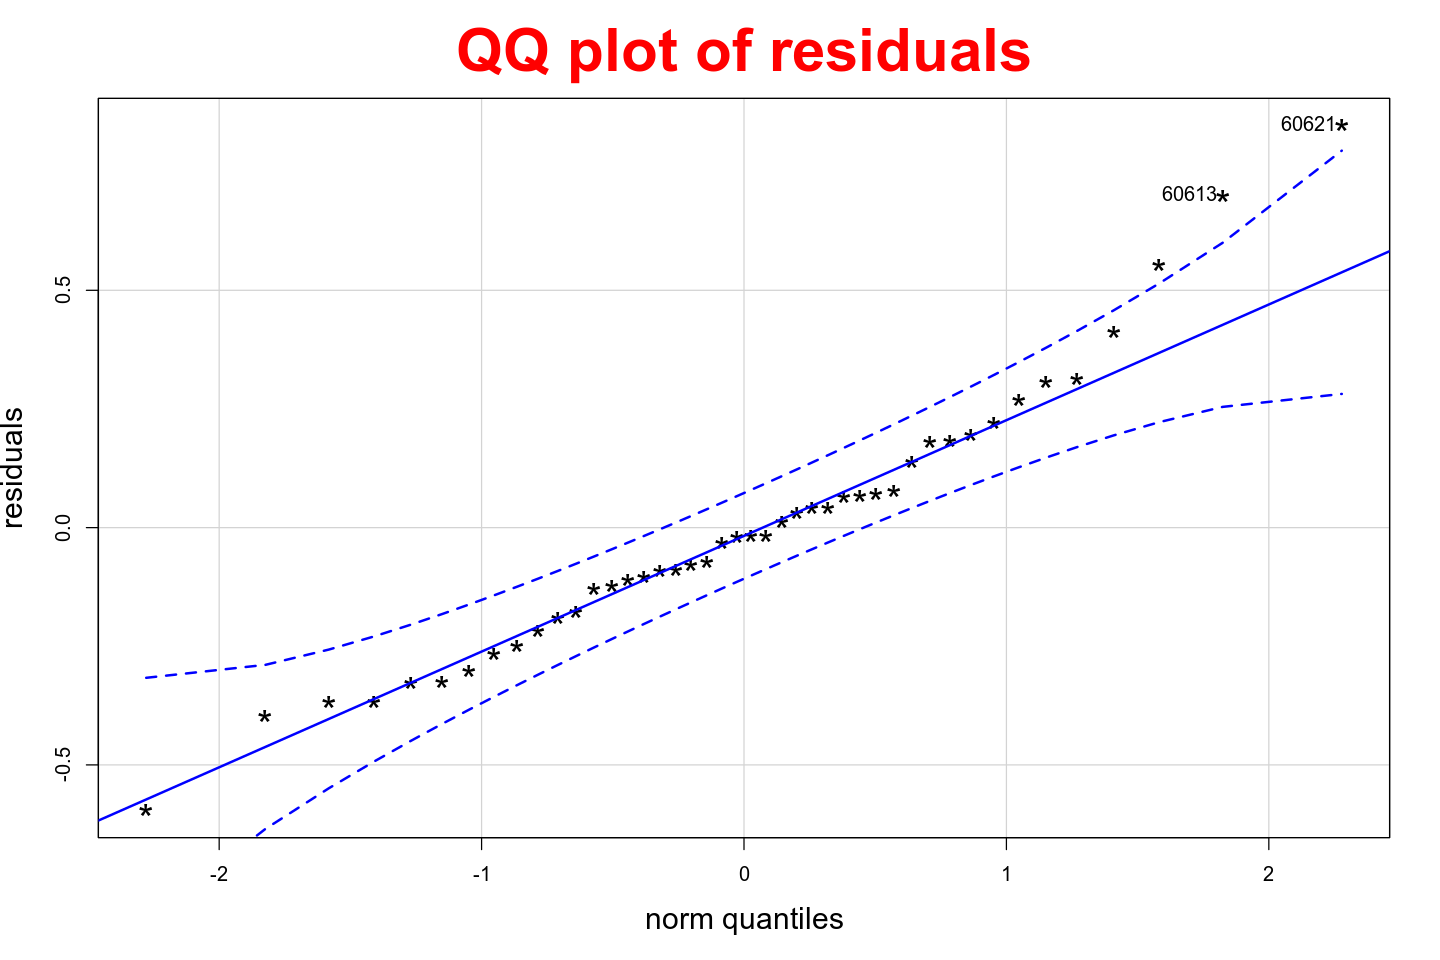

In [16]:
qqPlot(model3$residuals,ylab=list("residuals",cex=1.5),xlab=list("norm quantiles",cex=1.5), pch = '*' , cex = 2)
title(main="QQ plot of residuals",cex.main=3,col.main="red") 

*  Since the quantiles of the resdiuals almost matches that of the normal distribution we say that normality assumption holds for the residuals.

*  We will now try to validate our observation from the graph through Shapiro Wilk Test.

In [17]:
res = model3$residuals
shapiro.test(res)


	Shapiro-Wilk normality test

data:  res
W = 0.96022, p-value = 0.1326


*  Since the p-value is greater than 0.05,we can conclude that **normality** assumption of residuals holds at 5% level of significance.

-  To visualise the **normality** assumption let's look at the density plot of residuals.

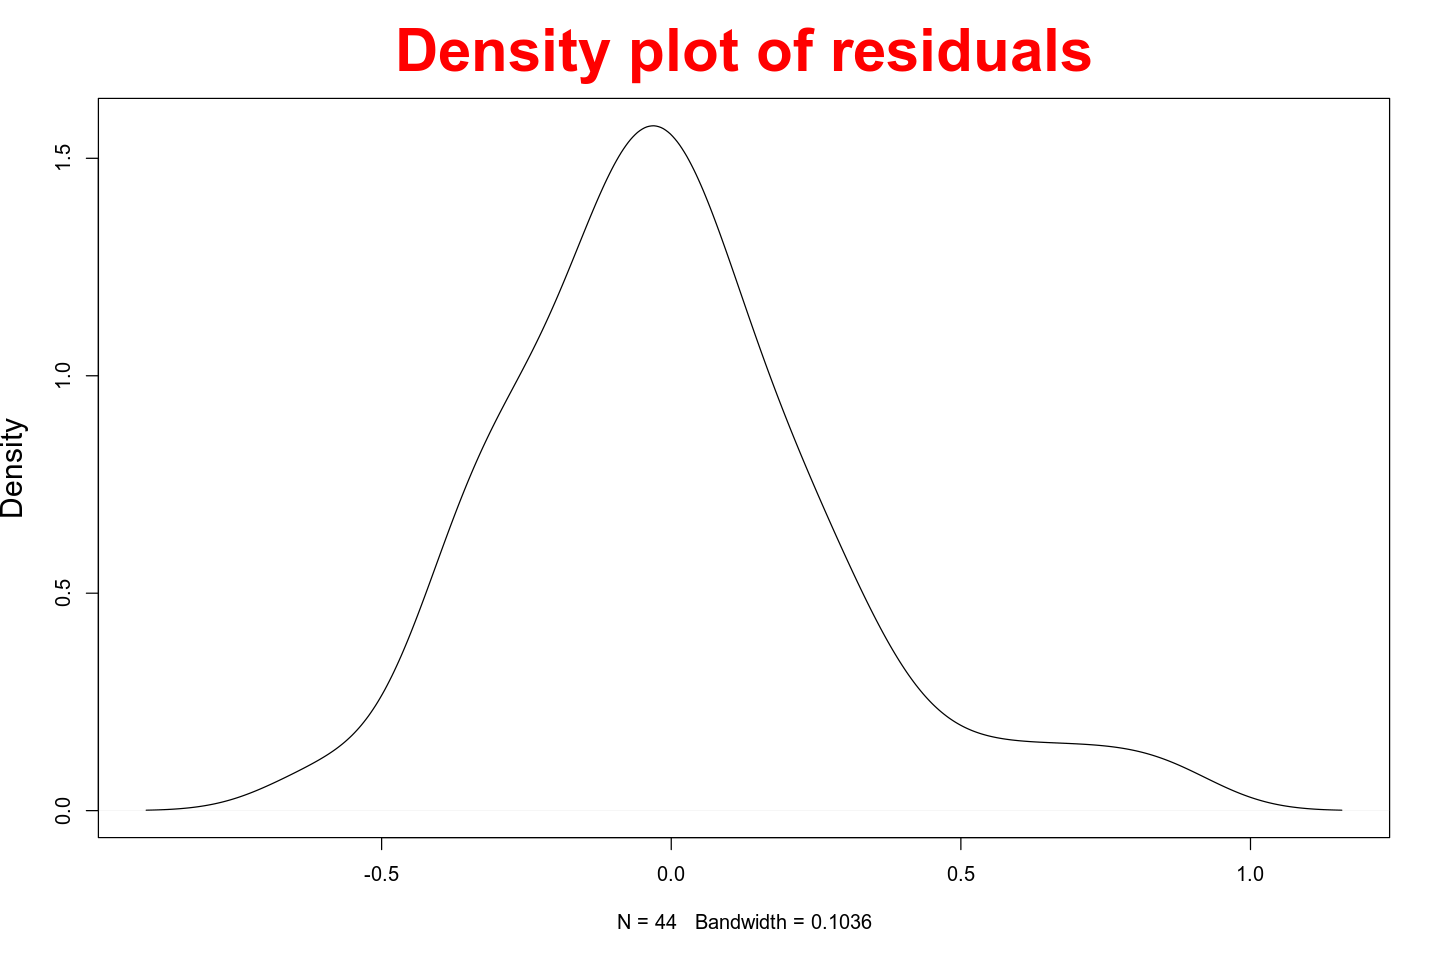

In [18]:
plot(density(model3$residuals),main='',ylab=list('Density',cex=1.5))
title(main="Density plot of residuals",cex.main=3,col.main="red") 

**<font color = 'darkblue'> From the graph it is clear that residuals are normally distributed.<font>**

## ii) Checking Homoscedasticity assumption of residuals

*  Here we will check the assumption of homoscedasticity using Breusch Pagan Test.

In [20]:
library('lmtest')
bptest(model3)


	studentized Breusch-Pagan test

data:  model3
BP = 11.903, df = 5, p-value = 0.03615


*  The $p-value = 0.036 < 0.05$. Hence Assumption of **Homoscedasticity** does not hold at 5% level of significance.

-  We will now look for a suitable transformation of the response to remove heteroscedasticity.<font>

 Let's take the **logshift** transformation as the response contains many zero-values.

In [21]:
diagnostics(trafo_lm(object = model3, trafo = "logshift"))

Diagnostics: Untransformed vs transformed model 

Transformation:  logshift  

Residual diagnostics:

Normality:
Pearson residuals:
                     Skewness Kurtosis Shapiro_W Shapiro_p
Untransformed model 0.7467368 3.943173 0.9602204 0.1326372
Transformed model   0.3493995 2.968722 0.9774532 0.5349264

Heteroscedasticity:
                    BreuschPagan_V BreuschPagan_p
Untransformed model      11.902510     0.03614831
Transformed model         7.709999     0.17295902

*  After the transformation we see that the p-value of Brusch Pagan test becomes 0.173 > 0.05. So at 5% level of significance we accept the homoscedasticity assumption. Hence the **logshift** transformation removes heteroscedasticity from the data

## Model fitting after transformation

In [22]:
t <- logtrafo(model3)
data_transformed_involact=as.data.frame(t)
data_transformed_involact=data_transformed_involact[,-1]
model4 = lm(involactt~., data = data_transformed_involact)
summary(model4)

involact  contains zero or negative values. Thus, 
         a shift equal to  1  is included such that y + shift > 0.


Call:
lm(formula = involactt ~ ., data = data_transformed_involact)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.26946 -0.10100 -0.00071  0.08784  0.43406 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.936453   2.428852  -0.797  0.43025    
race         0.004629   0.001504   3.078  0.00386 ** 
fire         0.028419   0.005149   5.519  2.6e-06 ***
theft       -0.001189   0.002874  -0.414  0.68139    
age          0.003403   0.001626   2.092  0.04315 *  
income       0.184075   0.252854   0.728  0.47108    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.169 on 38 degrees of freedom
Multiple R-squared:  0.8226,	Adjusted R-squared:  0.7992 
F-statistic: 35.24 on 5 and 38 DF,  p-value: 2.796e-13


*  After transformation the model now explains almost 80% of the total variation in the data.

## iii) Checking Multicollinearity of regressors

In [23]:
ols_coll_diag(model4)

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      race 0.2667197 3.749255
2      fire 0.3993133 2.504299
3     theft 0.5983547 1.671250
4       age 0.4789132 2.088061
5    income 0.2089407 4.786046


Eigenvalue and Condition Index
------------------------------
    Eigenvalue Condition Index    intercept        race        fire       theft
1 5.271381e+00        1.000000 3.690537e-06 0.003276327 0.003968710 0.002861183
2 4.364577e-01        3.475291 2.834308e-05 0.152277556 0.049619635 0.003051265
3 1.463102e-01        6.002400 5.300910e-06 0.207798301 0.506696434 0.069773571
4 9.870408e-02        7.307935 2.058703e-04 0.026372999 0.006737947 0.319111044
5 4.708944e-02       10.580360 9.049064e-07 0.178059420 0.295502350 0.592079273
6 5.712504e-05      303.772853 9.997559e-01 0.432215397 0.137474925 0.013123664
          age       income
1 0.001968809 3.937395e-06
2 0.005916482 3.603040e-05
3 0.023488330 6.875387e-06
4 

* Here the VIF values corresponding to each regressors are pretty small(< 5).So we can conclude that multicollinearity is not present among the regressors.

## 1.5 Model adequecy checking

** Now we will observe the relationship between the response and each regressor through component plus residual plots of each regressors.If there exits any linear relationship between any regressor and the response variable then *Component Plus Residual* plot plot of that regressor will be linear.**

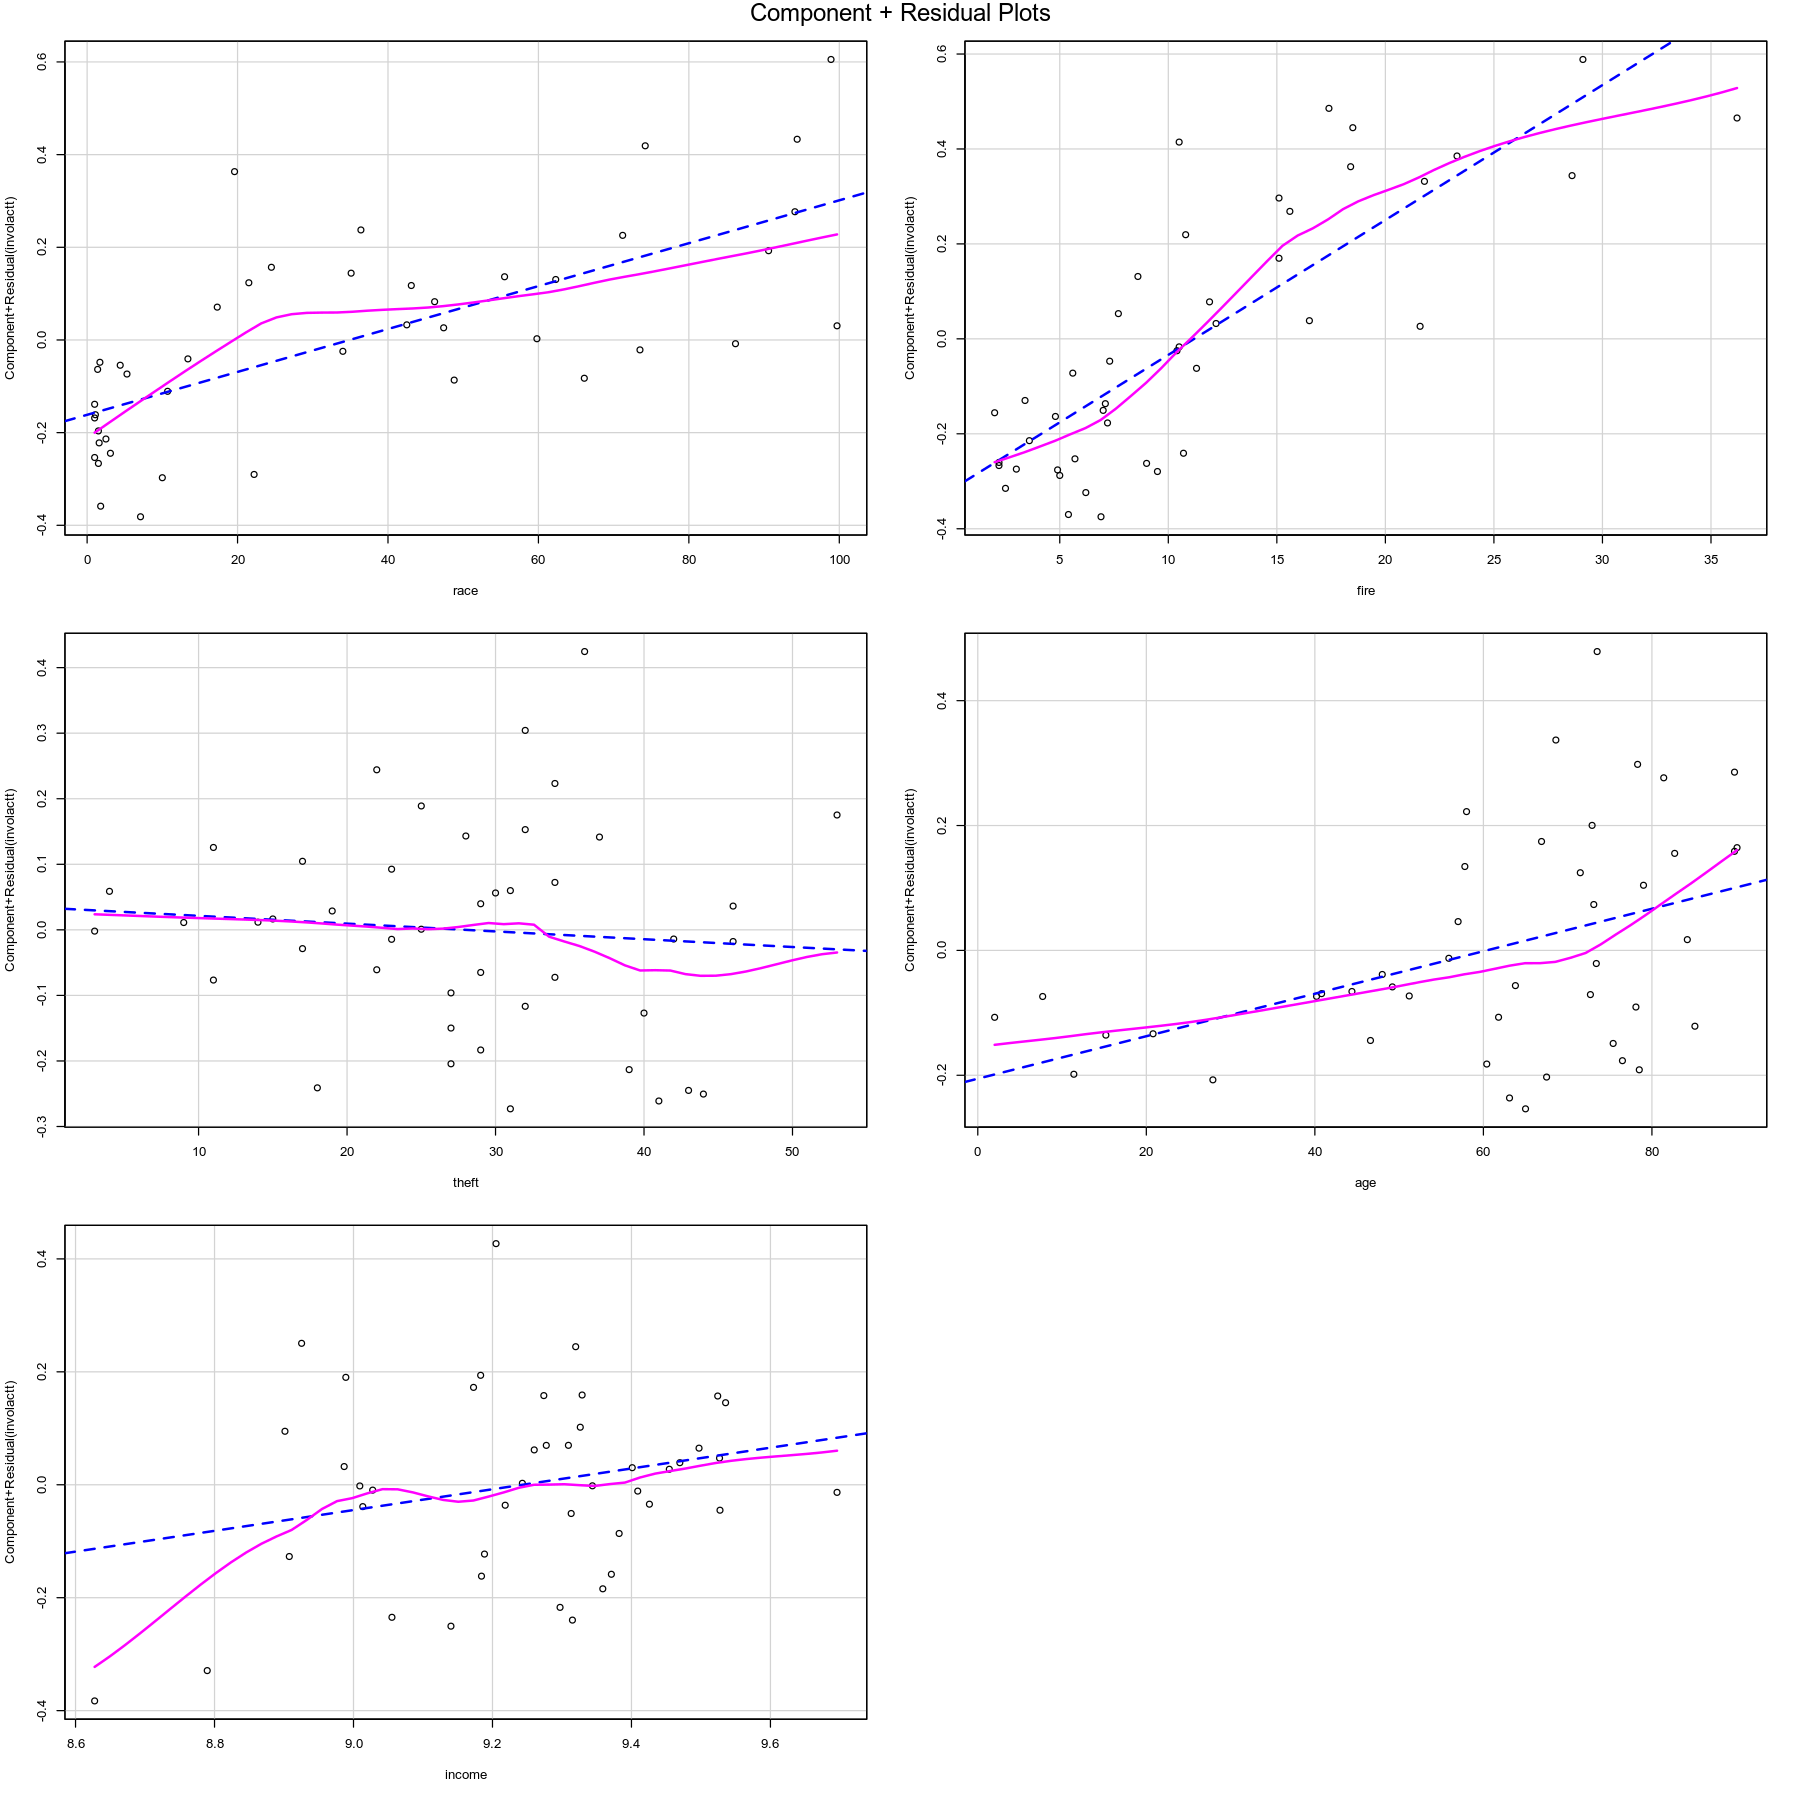

In [24]:
options(repr.plot.width= 15, repr.plot.height= 15)
crPlots(model4)

*  We observe that except **income** all the other regressors are linearly related with the response variable.

### We will now investigate the importance of each regressor for the linear regression model.

* **ols_correlations()** returns the relative importance of independent variables in determining response variable. How much each variable uniquely contributes to rsquare over and above that which can be accounted for by the other predictors?
  - **Zero order correlation**  is the Pearson correlation coefficient between the dependent variable and the independent variables. 
  - **Part correlations** indicates how much rsquare will decrease if that variable is removed from the model.
  - **partial correlations** indicates amount of variance in response variable, which is not estimated by the other independent variables in the model, but is estimated by the specific variable.

In [25]:
print(ols_correlations(model4))

               Correlations                 
-------------------------------------------
Variable    Zero Order    Partial     Part  
-------------------------------------------
race             0.743      0.447     0.210 
fire             0.862      0.667     0.377 
theft            0.389     -0.067    -0.028 
age              0.496      0.321     0.143 
income          -0.761      0.117     0.050 
-------------------------------------------


Let us now look at the result corresponding to **race** variable.
* Here we can observe that there is a high positive zero order correlation between **race** and **involact**.So more the racial composition in percent minority greater the chane of rejection of new insuarance or renewals.
* the partial correlation between **race** and **response** is also moderate.
* the part correlation is also significant.

- **Conclusion**

#### Hence ,the result of the first part of the analysis shows clear evidence of the fact that 'race' is a significant factor for non acceptance of new insuarance or renewals.

# Now let's have a look at the second part

# 2 Second part

## 2. Preliminary model fitting

In [26]:
# check for significance of regression
data_volact = subset(data ,select = - involact)
model5 = lm(volact ~., data = data_volact)
summary(model5)


Call:
lm(formula = volact ~ ., data = data_volact)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9116 -1.2289 -0.0456  0.9270  3.8627 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -12.98554   21.70453  -0.598 0.552939    
race         -0.05311    0.01401  -3.792 0.000484 ***
fire         -0.08635    0.04933  -1.751 0.087489 .  
theft         0.01127    0.01586   0.710 0.481428    
age          -0.06036    0.01544  -3.909 0.000340 ***
income        2.78035    2.25145   1.235 0.223892    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.882 on 41 degrees of freedom
Multiple R-squared:  0.7993,	Adjusted R-squared:  0.7748 
F-statistic: 32.65 on 5 and 41 DF,  p-value: 2.803e-13


* From the above summary we can observe that the $p-value: 2.803e-13 <0.05 $. Since it less than 0.05 we can colnclude at 5% level of significance that the fitted linear regression model is significant.
* The model explains $ 77.48 $% of the total variation in the data. The performance of the model in explaining the variation in the data in satisfactory. 

## 2.2 Leverage point detection

### Let's now investigate if there is any leverage point in the data.

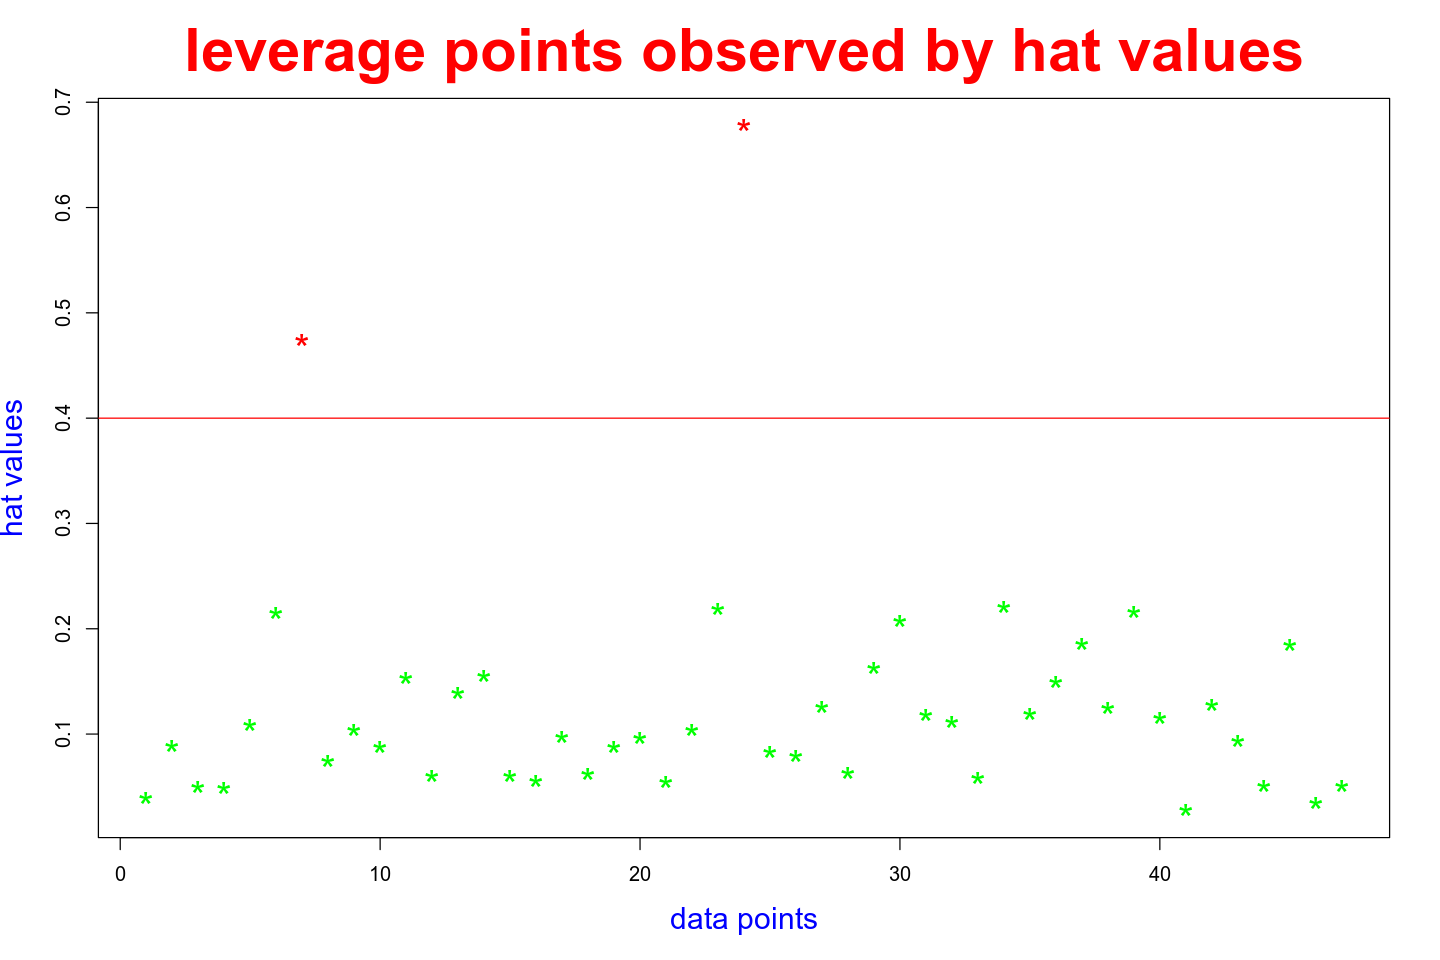

In [27]:
options(repr.plot.width= 12, repr.plot.height= 8)
hat = hatvalues(model5)
plot(hat, col = ifelse(hat > 0.4,"red","green") , pch = "*" , cex = 2, xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("hat values",cex=1.5,col="blue"))
title(main='leverage points observed by hat values',cex.main=3,col.main="red")
abline(h = 0.4,col = 'red')

* It seems that there are two potential leverage points present in the data

### Checking whether the model improves or not after eliminating the leverage points.

In [37]:
data_lev= data_volact[-which(hat > 0.4),]
model6 = lm(volact ~. , data = data_lev)
summary(model6)


Call:
lm(formula = volact ~ ., data = data_lev)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4018 -1.1148  0.0125  1.0400  3.7542 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -61.56920   23.64762  -2.604  0.01298 * 
race         -0.03030    0.01372  -2.208  0.03319 * 
fire         -0.06665    0.04473  -1.490  0.14431   
theft        -0.01287    0.02331  -0.552  0.58382   
age          -0.04551    0.01426  -3.191  0.00280 **
income        7.90831    2.46109   3.213  0.00263 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.648 on 39 degrees of freedom
Multiple R-squared:  0.8528,	Adjusted R-squared:  0.834 
F-statistic: 45.21 on 5 and 39 DF,  p-value: 3.351e-15


*   We can observe that the model impoves to a significant extent as the Adjusted R-squared value increases from 0.7748 to 0.834.So we will delete these points from the data.

## 2.3 Influential point detection

### We will now check for the influential points present in the data using Cook'S Distance, Covratio , DFFIT.

In [38]:
ckd = cooks.distance(model6)
cvratio = covratio(model6)
dffit  = dffits(model6)

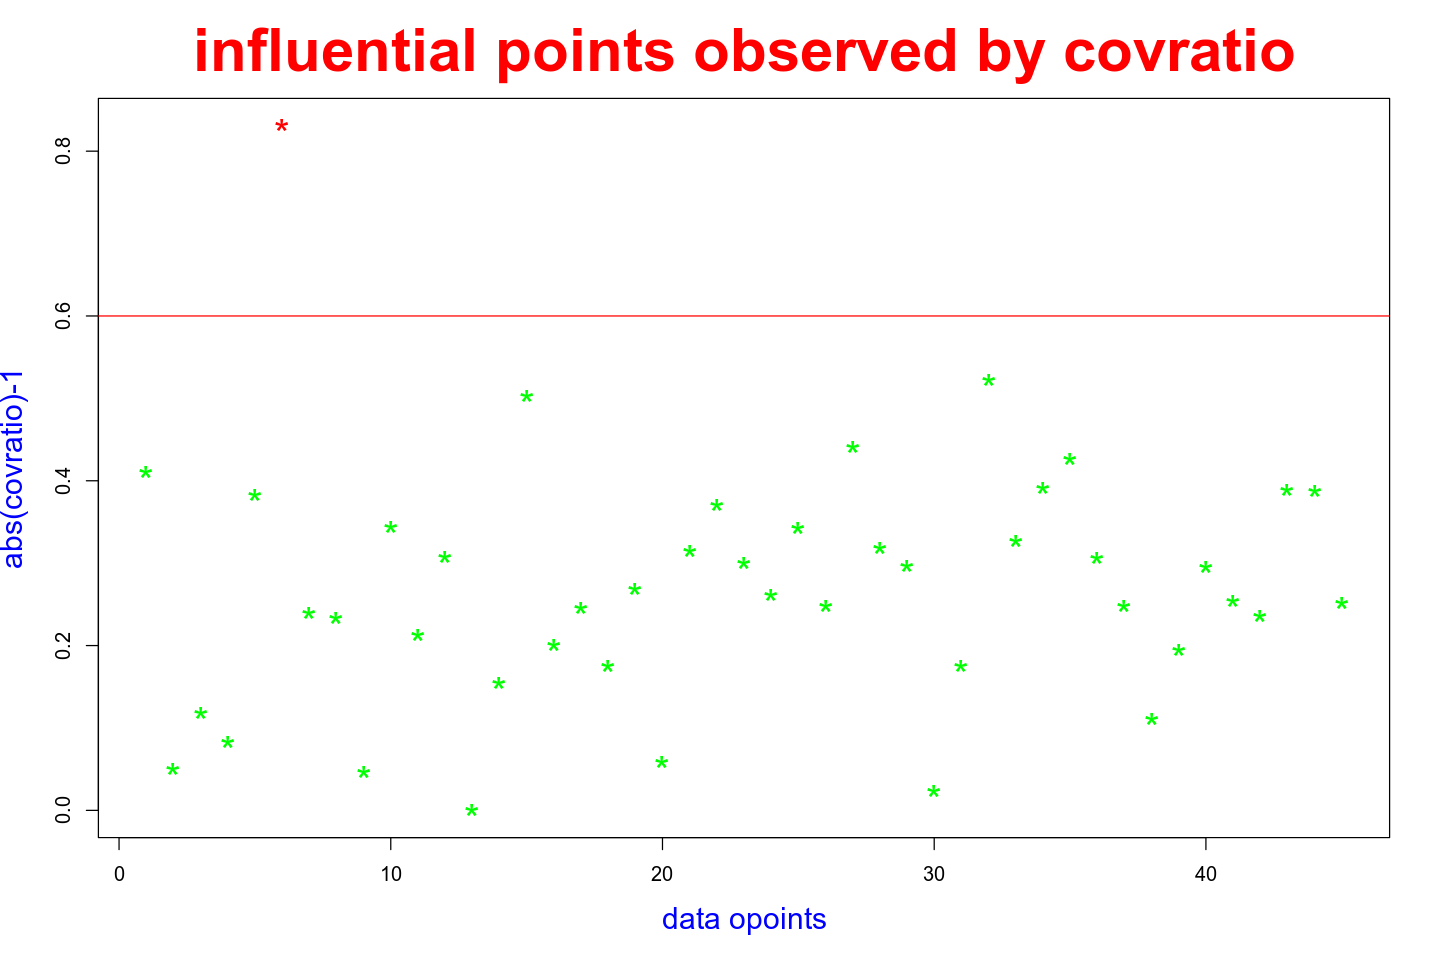

In [39]:
# plot of covratio
plot(abs(cvratio-1), pch="*", cex=2,col = ifelse(abs(cvratio -1) > 0.6,"red","green"),
    xlab=list("data opoints",cex=1.5,col="blue"), 
    ylab=list("abs(covratio)-1",cex=1.5,col="blue"))  # plot covratio
title(main='influential points observed by covratio',cex.main=3,col.main="red")
abline(h = 0.6 , col="red")  # add cutoff line

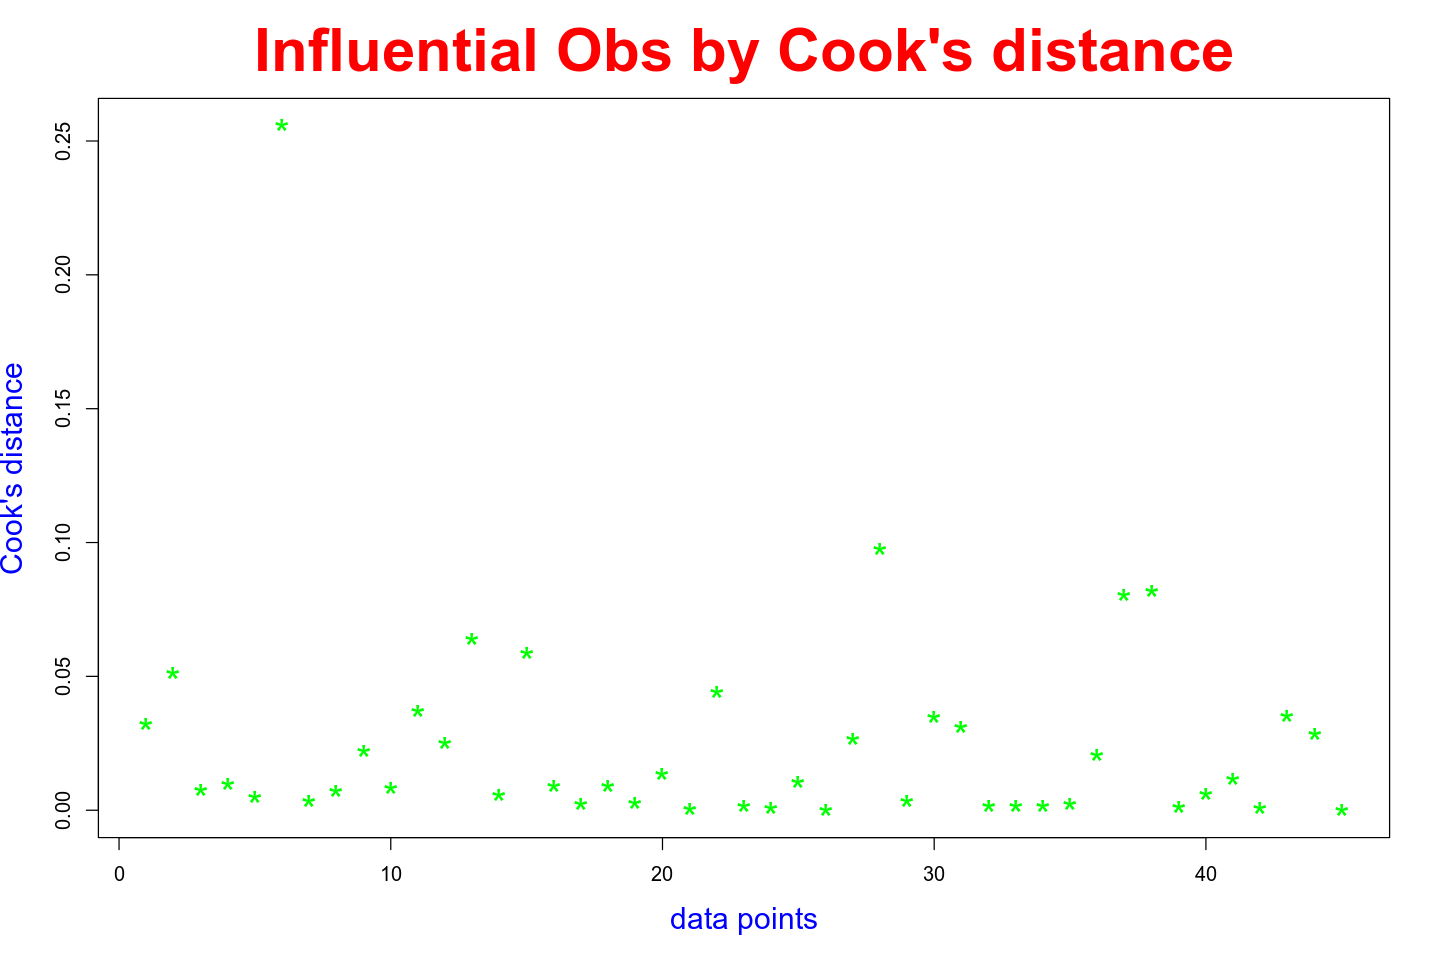

In [40]:
plot(ckd, pch="*", cex=2,col = ifelse(ckd > 0.4,"red","green"), 
    xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("Cook's distance",cex=1.5,col="blue"))
title("Influential Obs by Cook's distance",cex.main=3,col.main="red")  # plot cook's distance
abline(h = 0.4 , col="red")  # add cutoff line

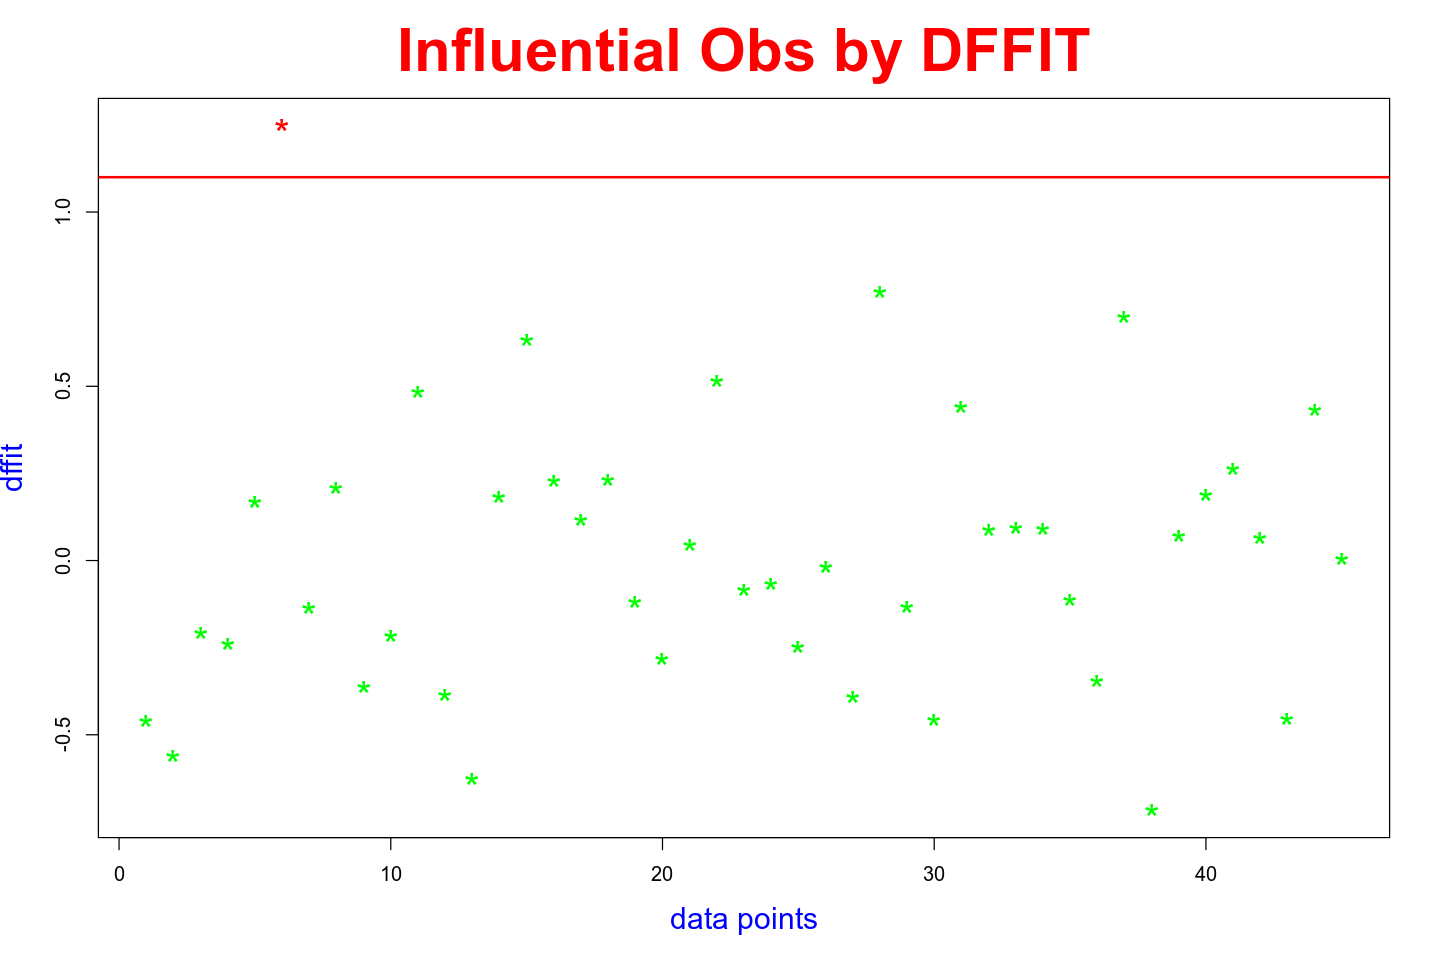

In [41]:
# plot of dffit values
plot(dffit, pch="*", cex=2,col = ifelse(abs(dffit) >1.1,"red","green"),
         xlab=list("data points",cex=1.5,col="blue"), 
    ylab=list("dffit",cex=1.5,col="blue"))
     
title(main="Influential Obs by DFFIT",cex.main=3,col.main="red")  # plot dffit
abline(h = c(1.1,-1.1), col="red",lwd = c(2,2))  # add cutoff line


In [42]:
ckd_infl = which(ckd > 0.4)
covratio_infl = which(abs(cvratio-1) > 0.8)
dffit_infl = which(abs(dffit)>1.1)
# influential point detected using Cook's distance
print(ckd_infl)
print(covratio_infl)
print(dffit_infl)

named integer(0)
60610 
    6 
60610 
    6 


In [43]:
influential_points = union(ckd_infl,union(covratio_infl,dffit_infl))
length(influential_points)

[1] 1

In [44]:
data_infl_volact = data_lev[-influential_points,]
model7 = lm(volact~., data = data_infl_volact)
summary(model7)


Call:
lm(formula = volact ~ ., data = data_infl_volact)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3542 -1.1794 -0.0256  0.9285  3.6061 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept) -63.22105   23.51575  -2.688  0.01060 * 
race         -0.02386    0.01456  -1.639  0.10957   
fire         -0.09497    0.04986  -1.905  0.06439 . 
theft        -0.03220    0.02783  -1.157  0.25443   
age          -0.03690    0.01575  -2.344  0.02443 * 
income        8.09568    2.44809   3.307  0.00207 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.637 on 38 degrees of freedom
Multiple R-squared:  0.8574,	Adjusted R-squared:  0.8386 
F-statistic: 45.68 on 5 and 38 DF,  p-value: 4.692e-15


*  Since Adjusted R-squared value increases deletion of the influential point make sense.Although the improvement is not significant enough but we should consider the fact that we are removing just one observation. 

### why analysis without 'income'?

As it is evident that acceptance of insurance always depends on **income** we kept aside this regressor and conduct further analysis considering the rest.

In [45]:
summary(lm(volact ~income , data = data_infl_volact))


Call:
lm(formula = volact ~ income, data = data_infl_volact)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3558 -1.1435 -0.0267  0.8807  4.5380 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -142.777     12.148  -11.75 7.29e-15 ***
income        16.159      1.314   12.30 1.65e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.921 on 42 degrees of freedom
Multiple R-squared:  0.7827,	Adjusted R-squared:  0.7775 
F-statistic: 151.3 on 1 and 42 DF,  p-value: 1.65e-15


From the fitted model we see that only income explains $77.75$% of the total variation in the data which is quite significant.

### Analysis after droping the 'income' column

In [46]:
data_volact_new = subset(data_infl_volact, select = -income)
model8 = lm(volact ~., data = data_volact_new)
summary(model8)


Call:
lm(formula = volact ~ ., data = data_volact_new)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4250 -1.0337 -0.1351  1.0022  3.5465 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 14.50217    0.86286  16.807  < 2e-16 ***
race        -0.05555    0.01228  -4.522 5.58e-05 ***
fire        -0.15597    0.05188  -3.006 0.004611 ** 
theft       -0.02109    0.03094  -0.682 0.499497    
age         -0.06032    0.01575  -3.828 0.000456 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.833 on 39 degrees of freedom
Multiple R-squared:  0.8163,	Adjusted R-squared:  0.7975 
F-statistic: 43.33 on 4 and 39 DF,  p-value: 7.546e-14


*  From the above summary we can observe that the $p-value: 7.546e-14 <0.05 $. Since it less than 0.05 we can colnclude at 5% level of significance that the fitted linear regression model is significant.
* The model explains $ 79.75  $% of the total variation in the data. The performance of the model in explaining the variation in the data in satisfactory. 

## 2.4 verifiication of the assumptions of linear regression

## i) Checking normality and homoscedasticity assumption of the residuals


The default lambdarange for the Log shift opt transformation is calculated dependent on the data range. The lower value is set to 0.5 and the upper value to 13.8

The default lambdarange for the Square-root shift transformation is calculated dependent on the data range. The lower value is set to 0.5 and the upper value to 13.8

Test normality assumption 
              Skewness Kurtosis Shapiro_W Shapiro_p
manly           0.2877   2.5983    0.9829    0.7498
sqrtshift       0.3534   2.6964    0.9809    0.6680
untransformed   0.1705   2.5036    0.9807    0.6632
modulus         0.3889   2.7678    0.9804    0.6486
yeojohnson      0.3889   2.7678    0.9804    0.6486
logshiftopt     0.4268   2.8451    0.9797    0.6231
gpower          0.4077   2.7976    0.9797    0.6230
boxcox          0.3876   2.7969    0.9795    0.6133
bickeldoksum    0.3875   2.7969    0.9795    0.6133
dual            0.2943   2.7331    0.9790    0.5932
neglog          0.5163   3.2746    0.9670    0.2363
glog            0.

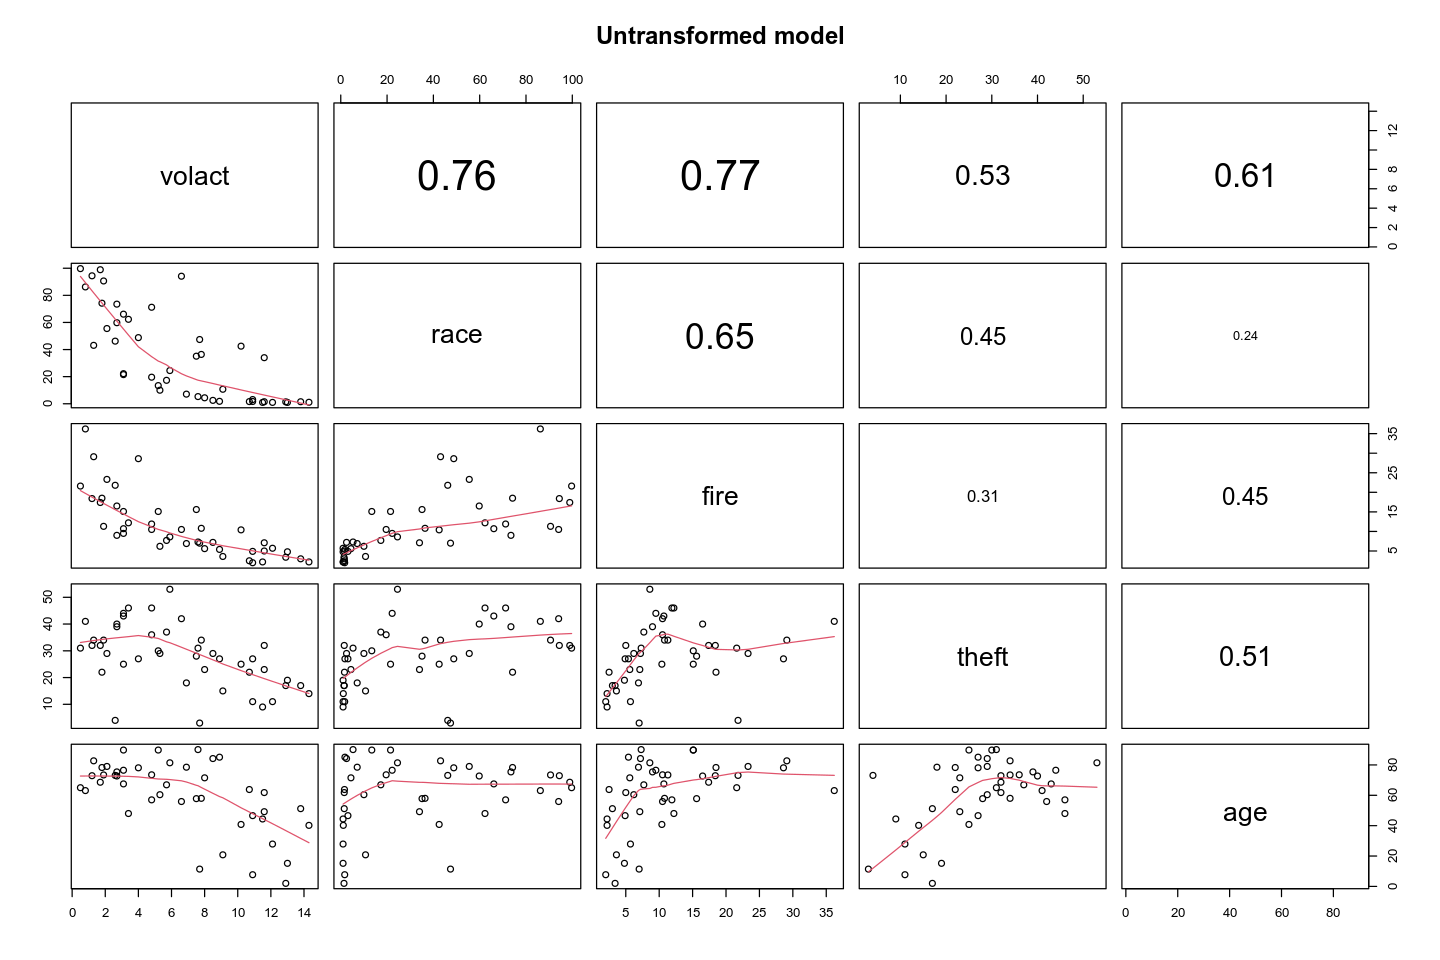

Press [enter] to continue


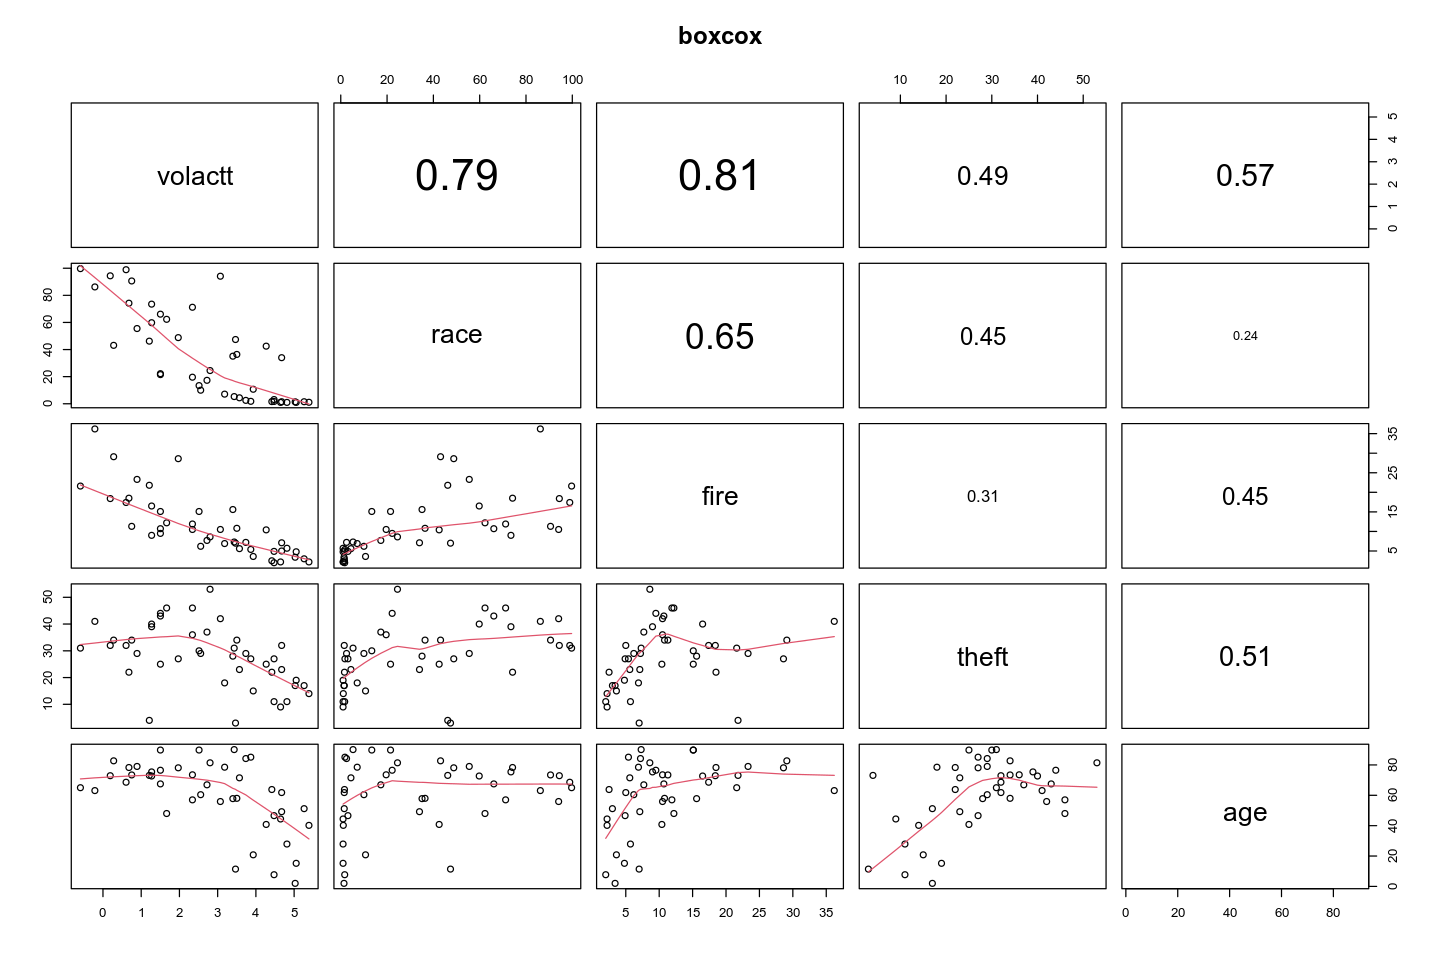

Press [enter] to continue


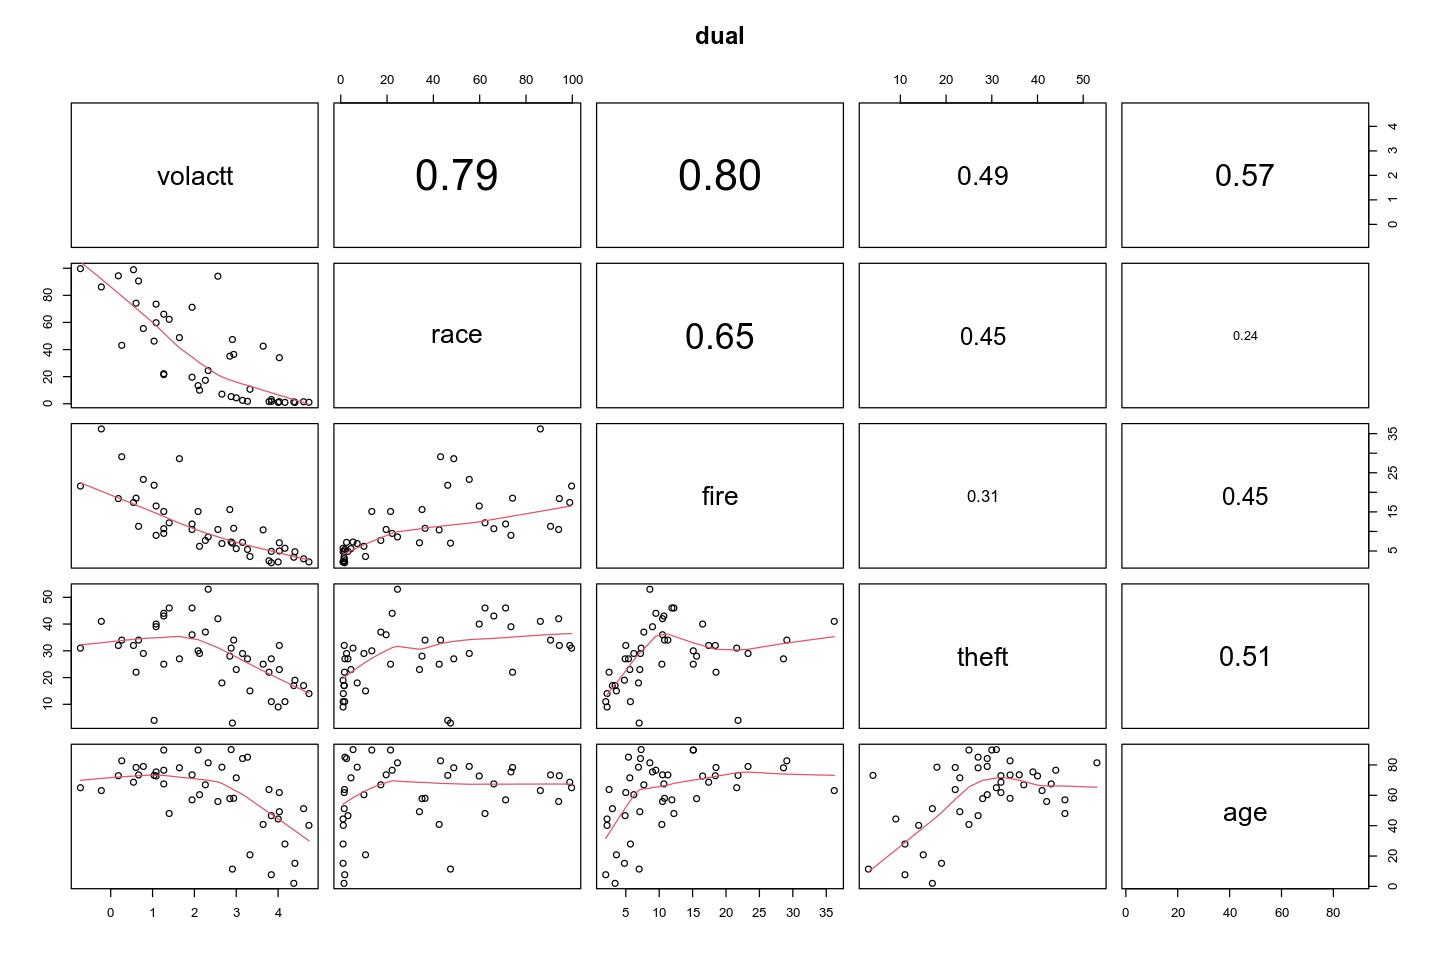

Press [enter] to continue


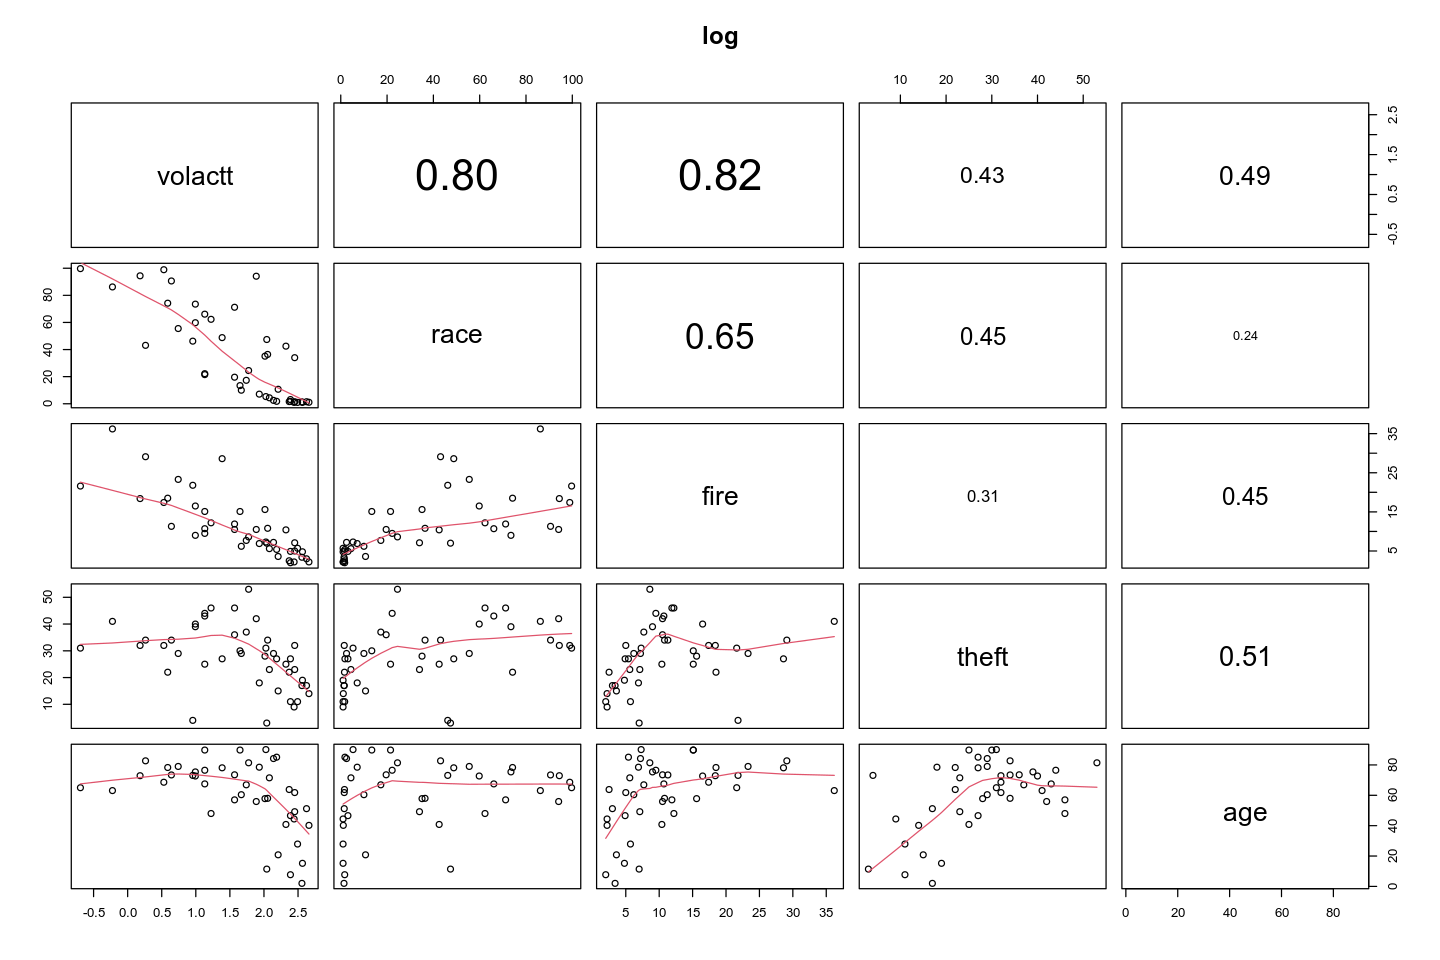

Press [enter] to continue


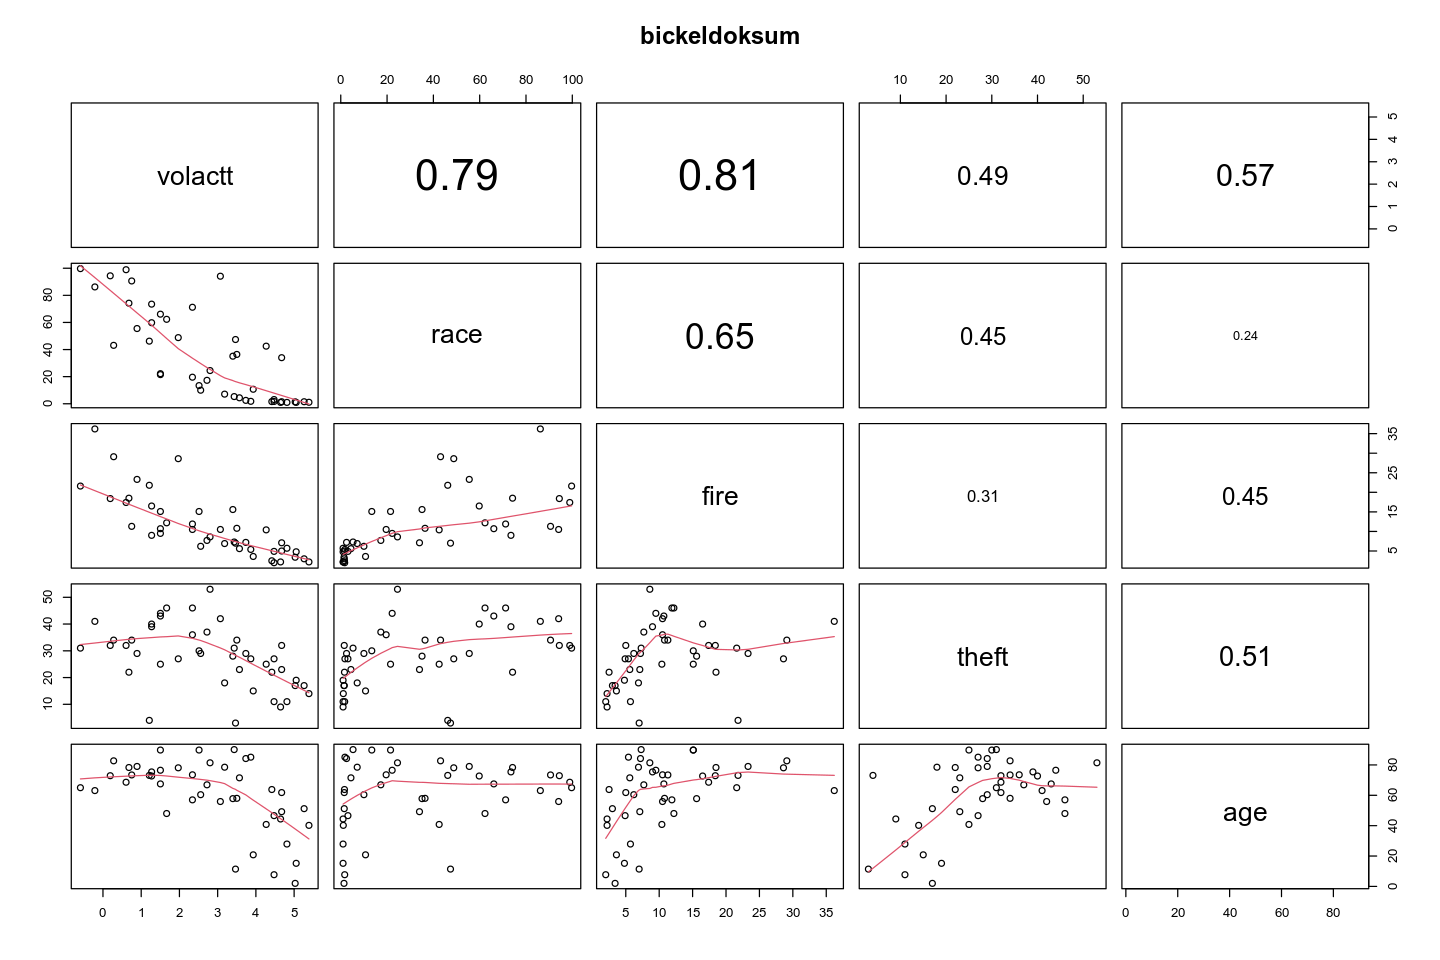

Press [enter] to continue


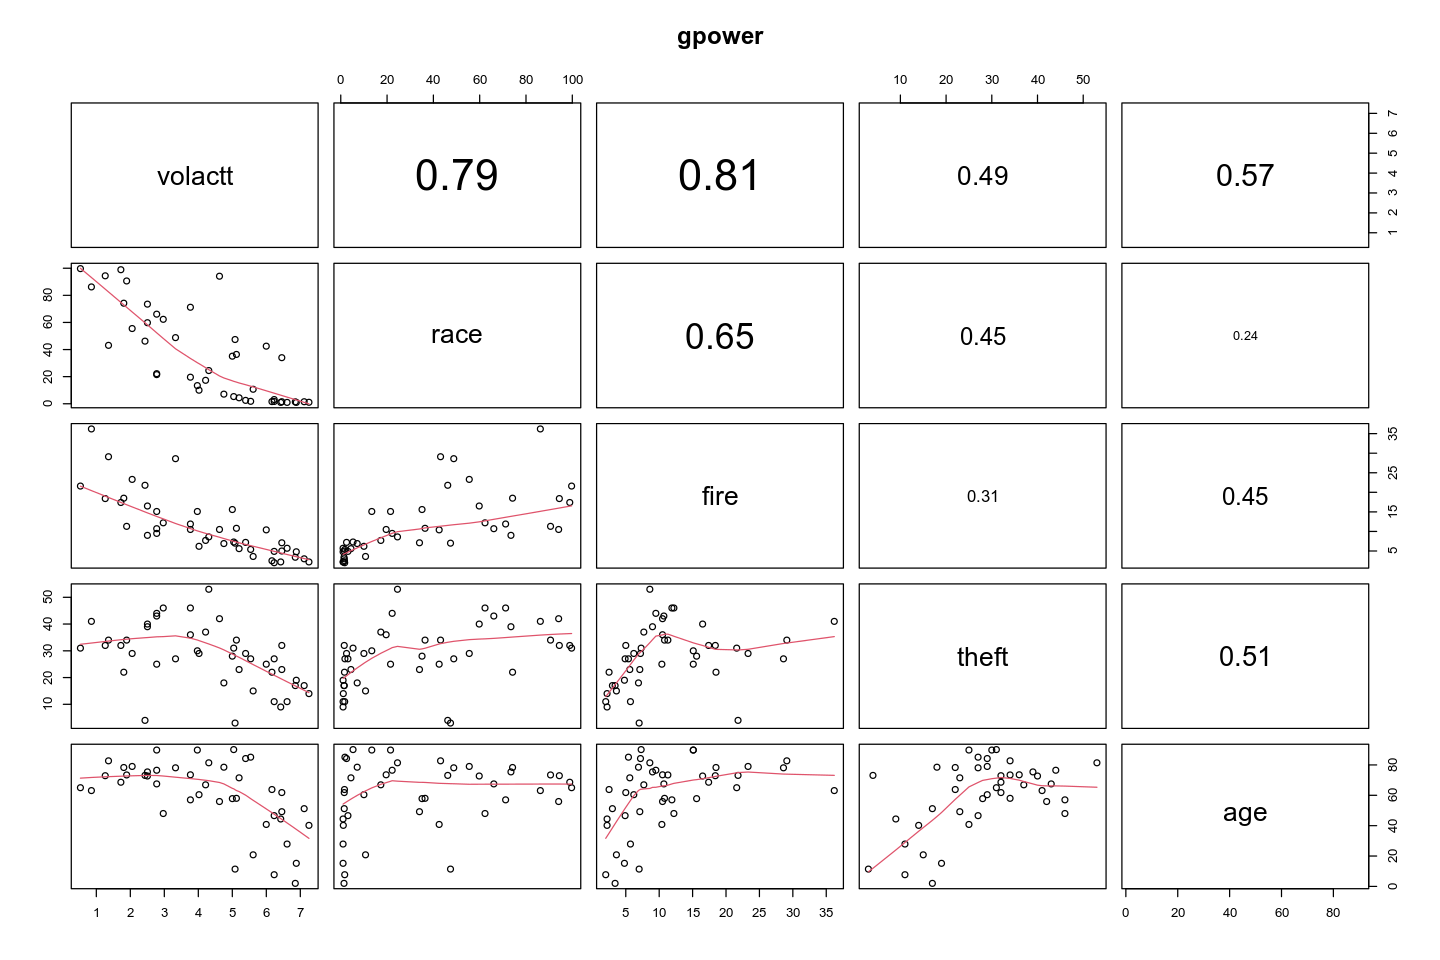

Press [enter] to continue


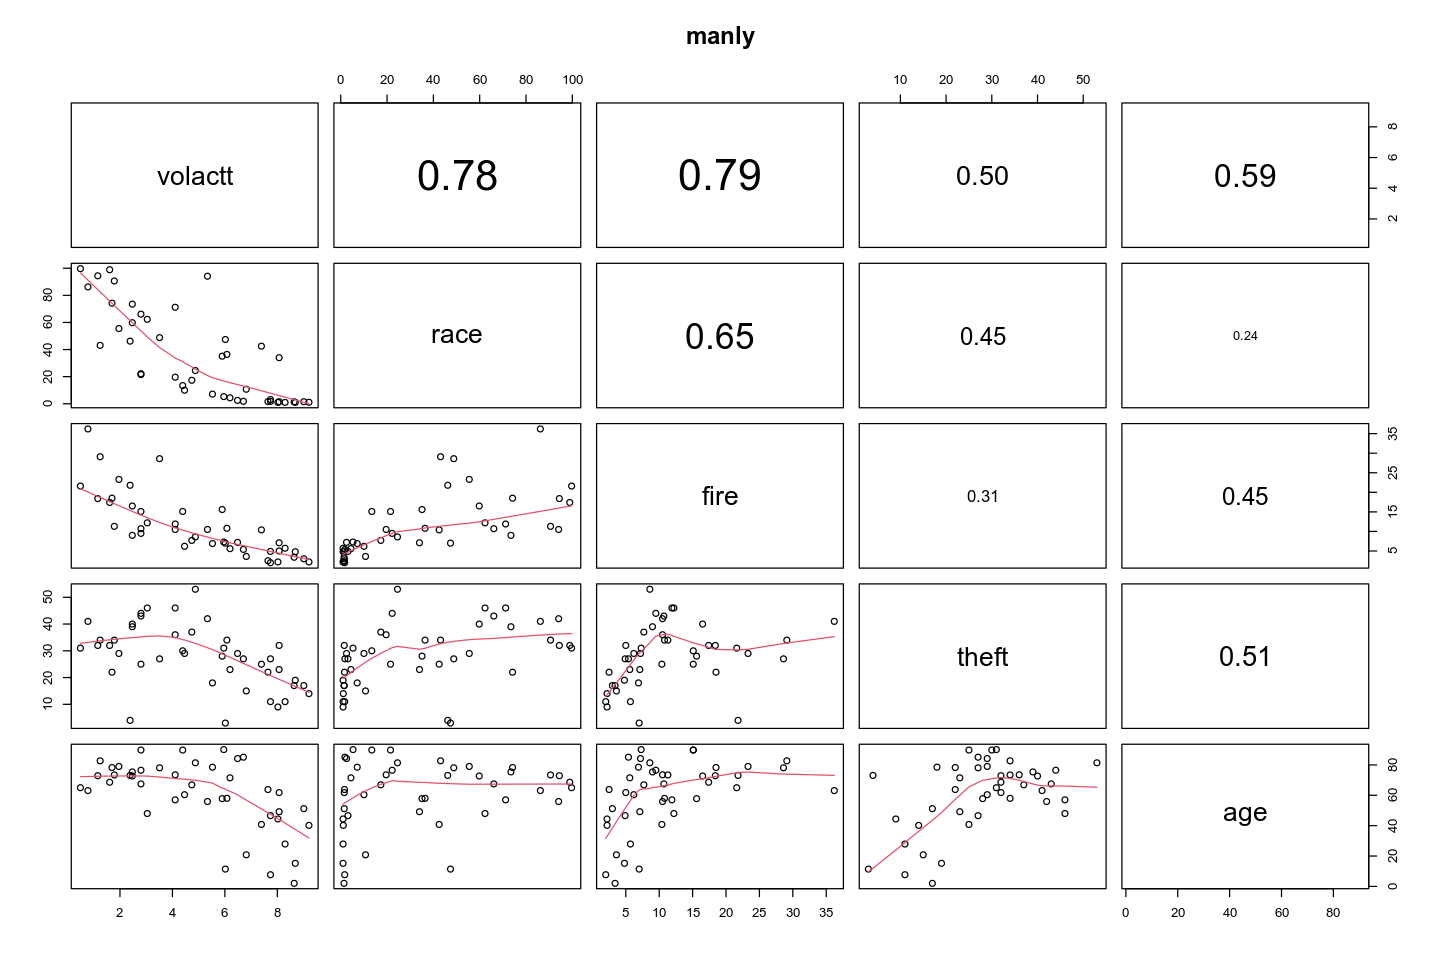

Press [enter] to continue


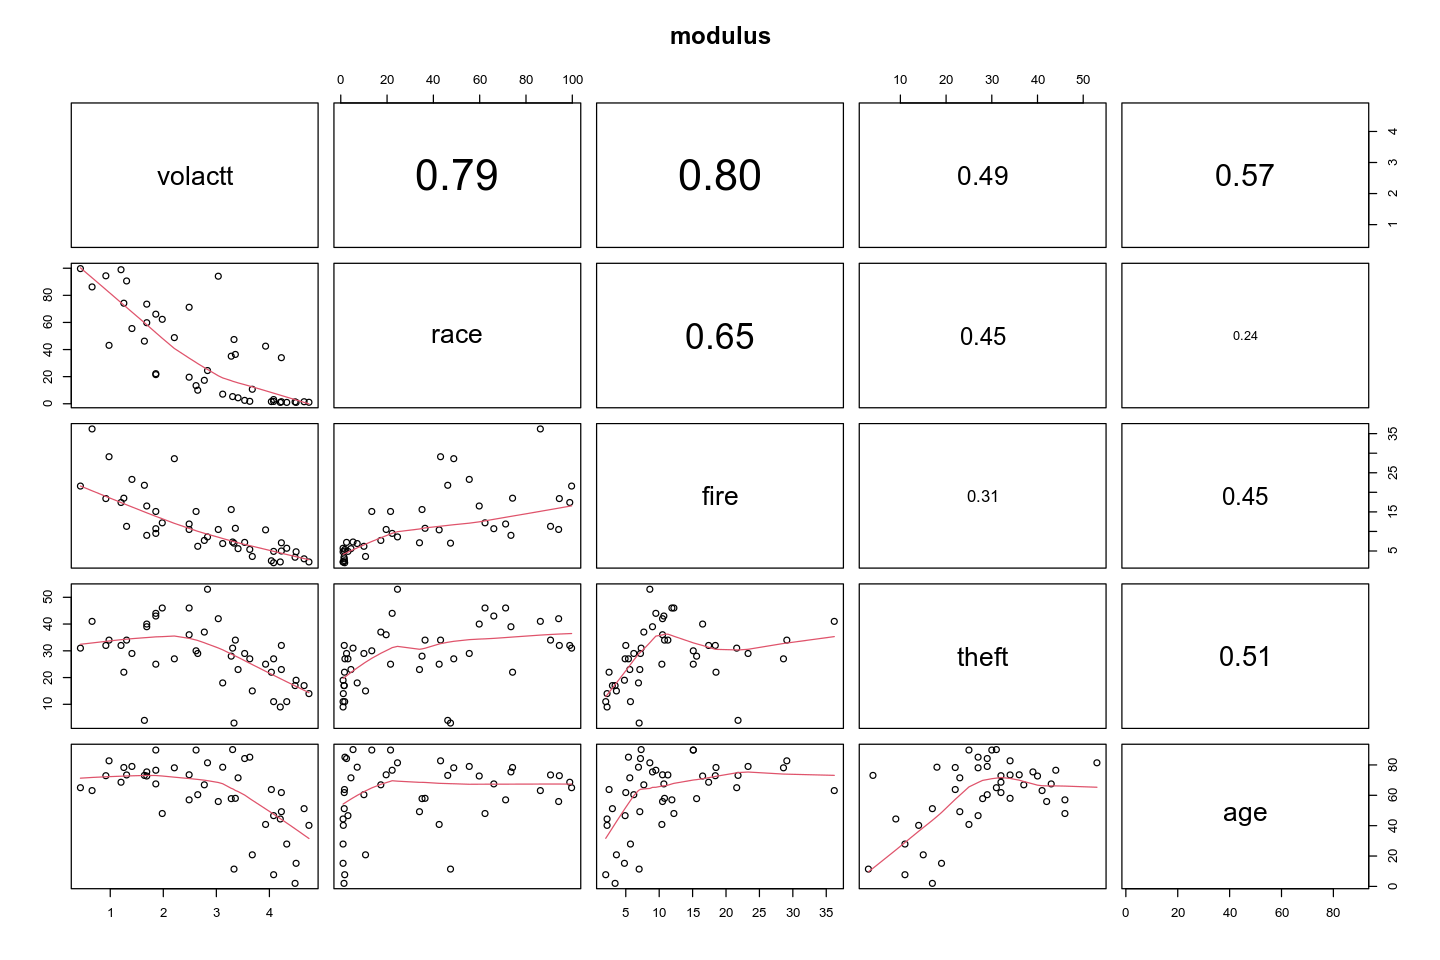

Press [enter] to continue


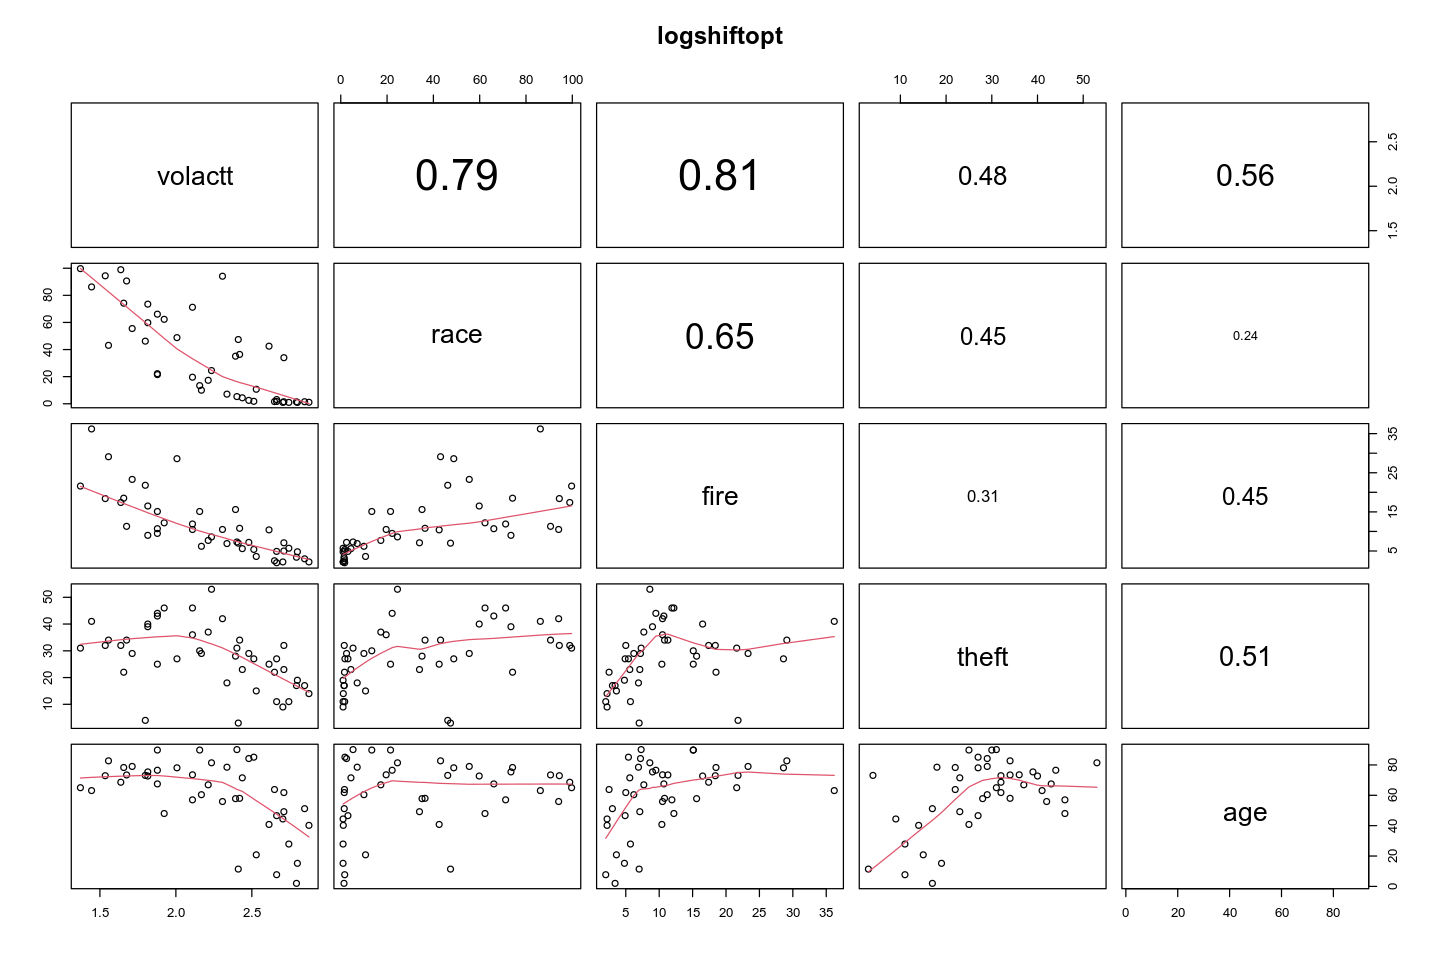

Press [enter] to continue


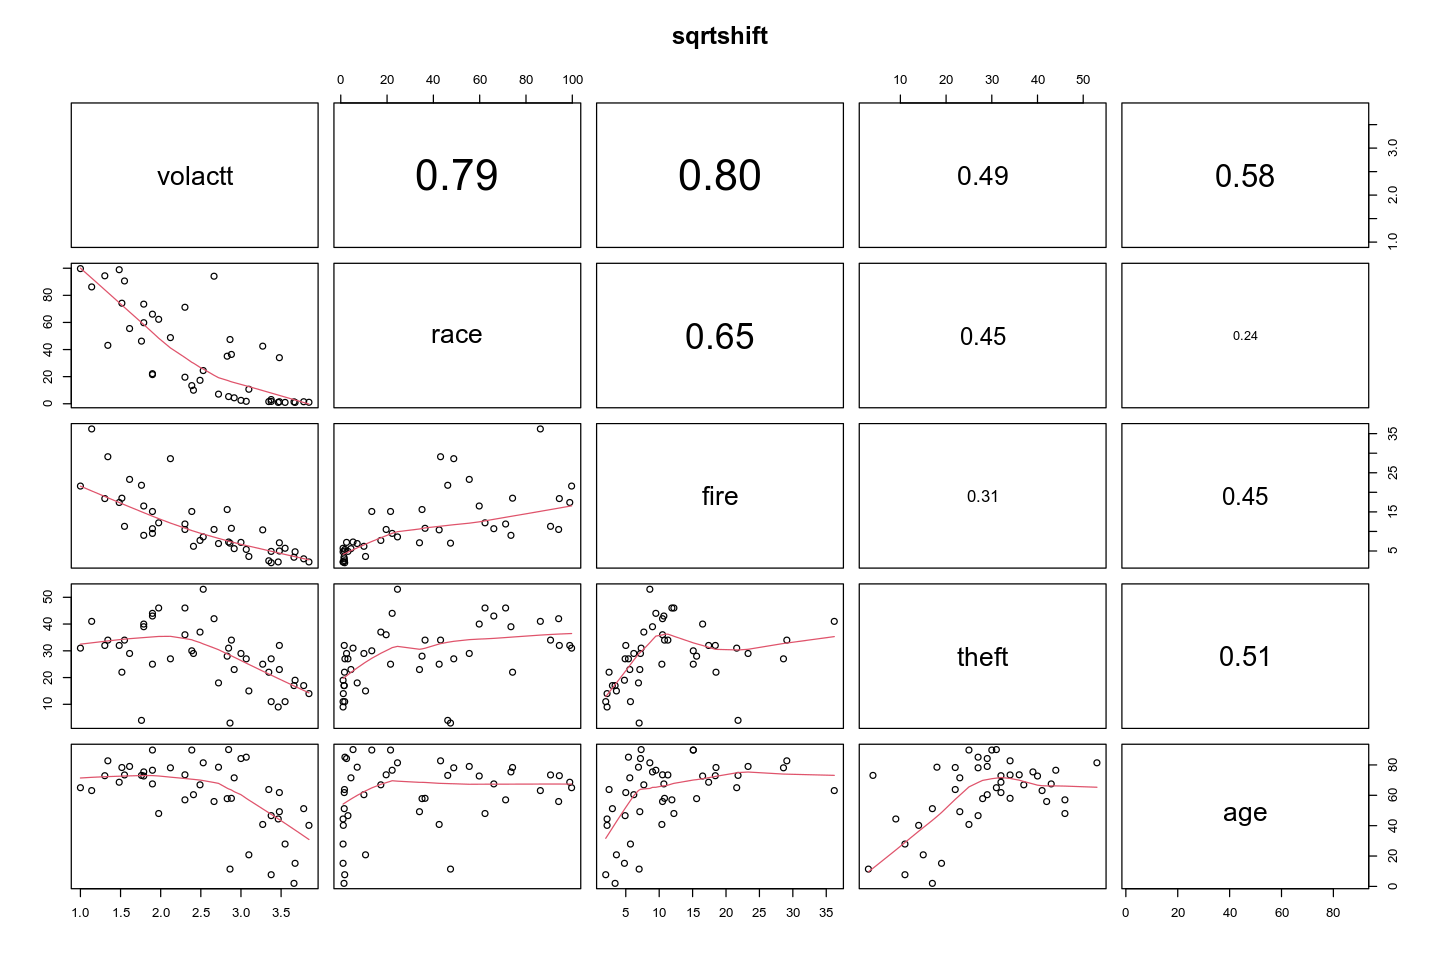

Press [enter] to continue


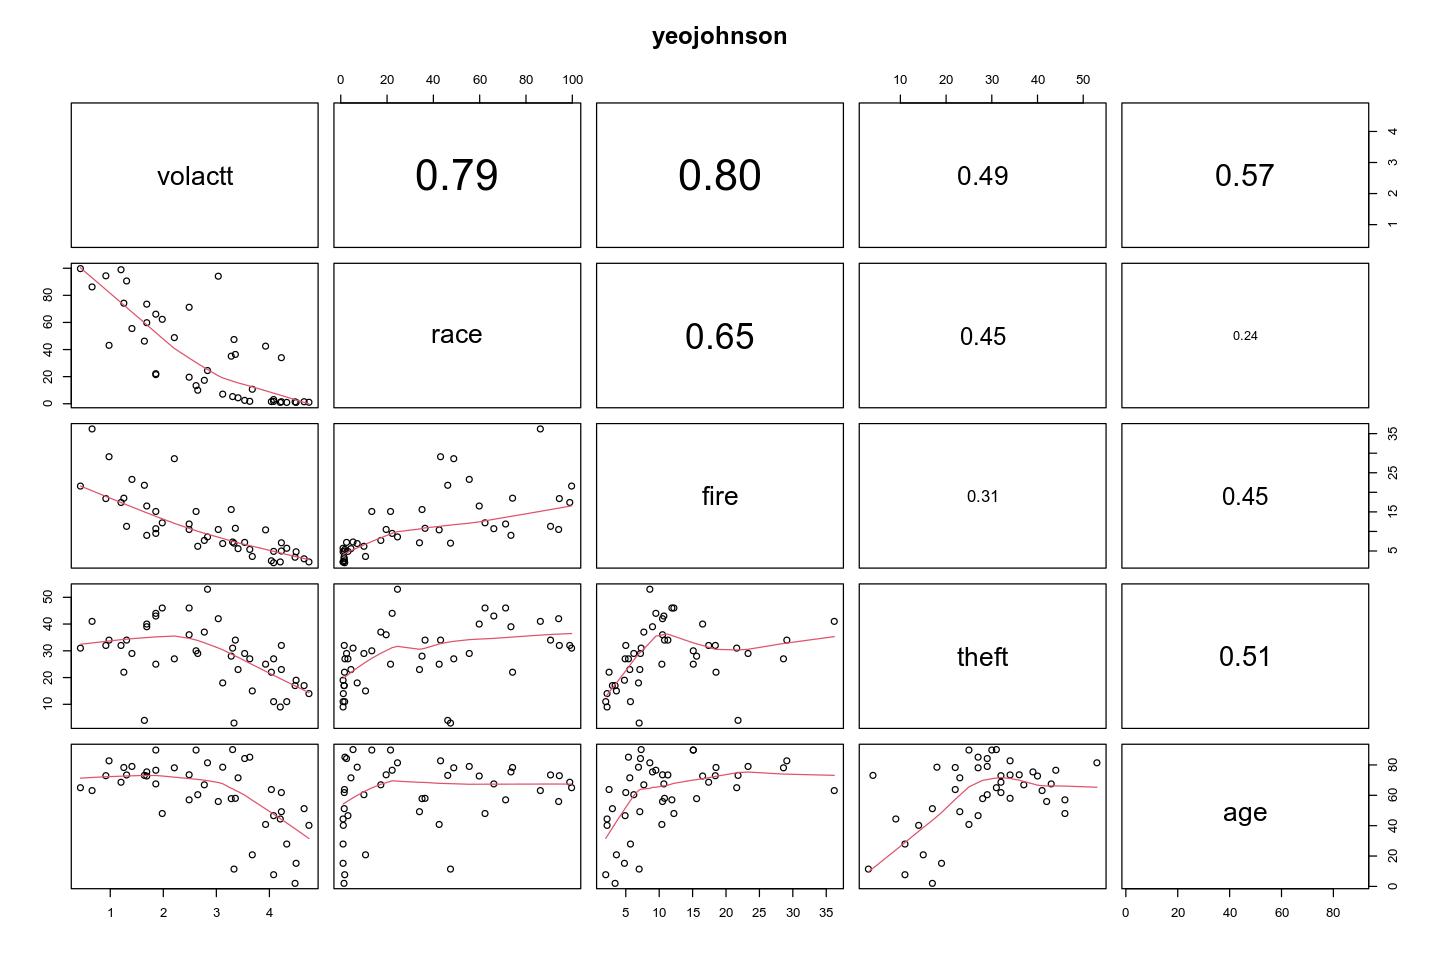

Press [enter] to continue


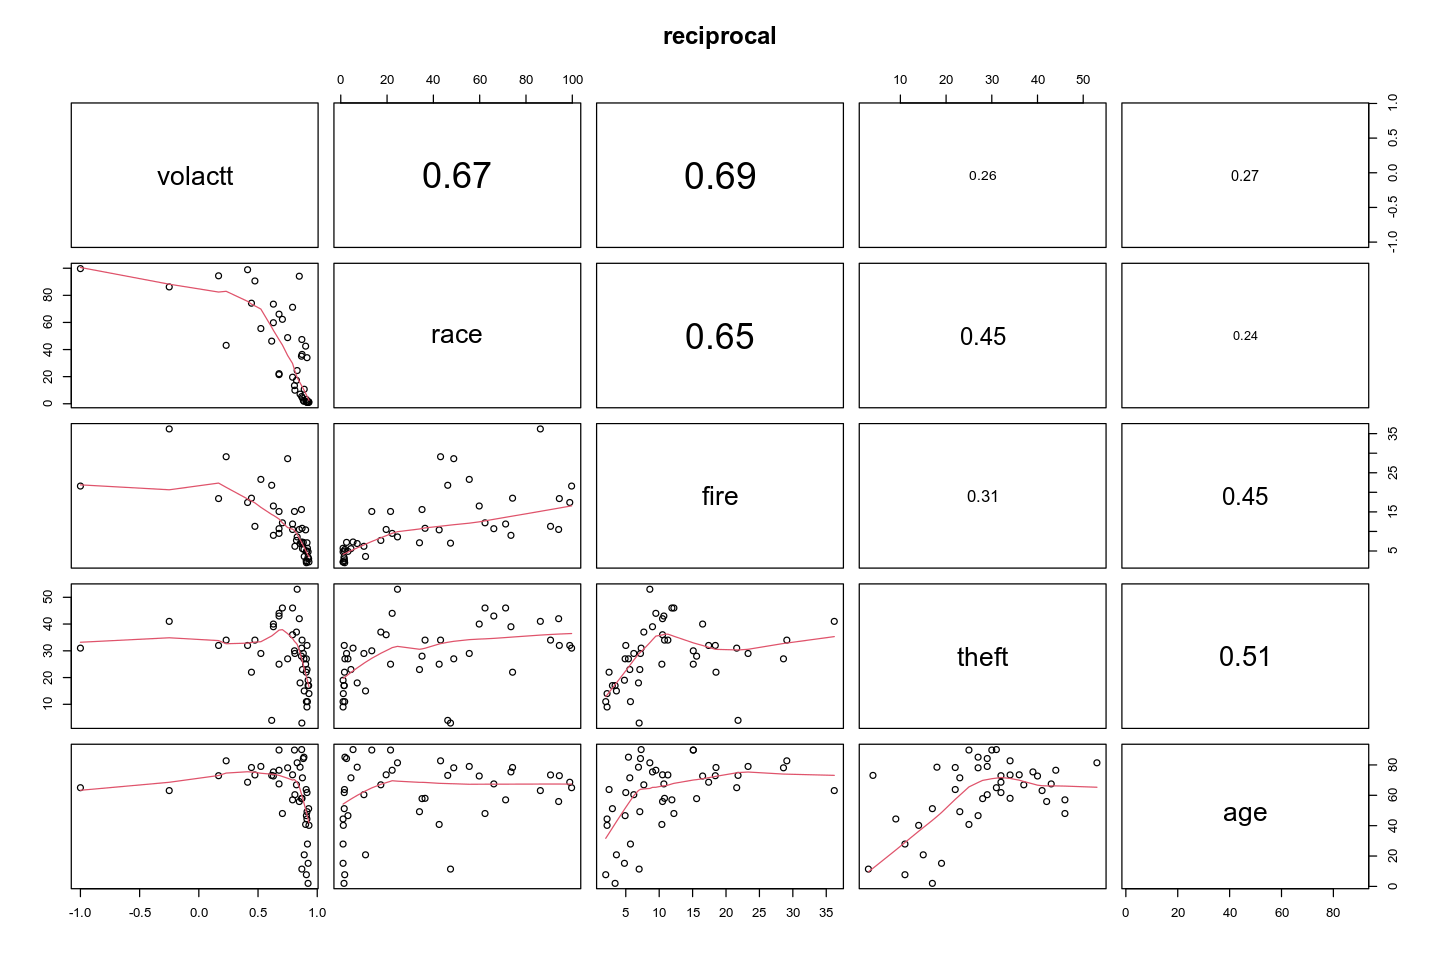

Press [enter] to continue

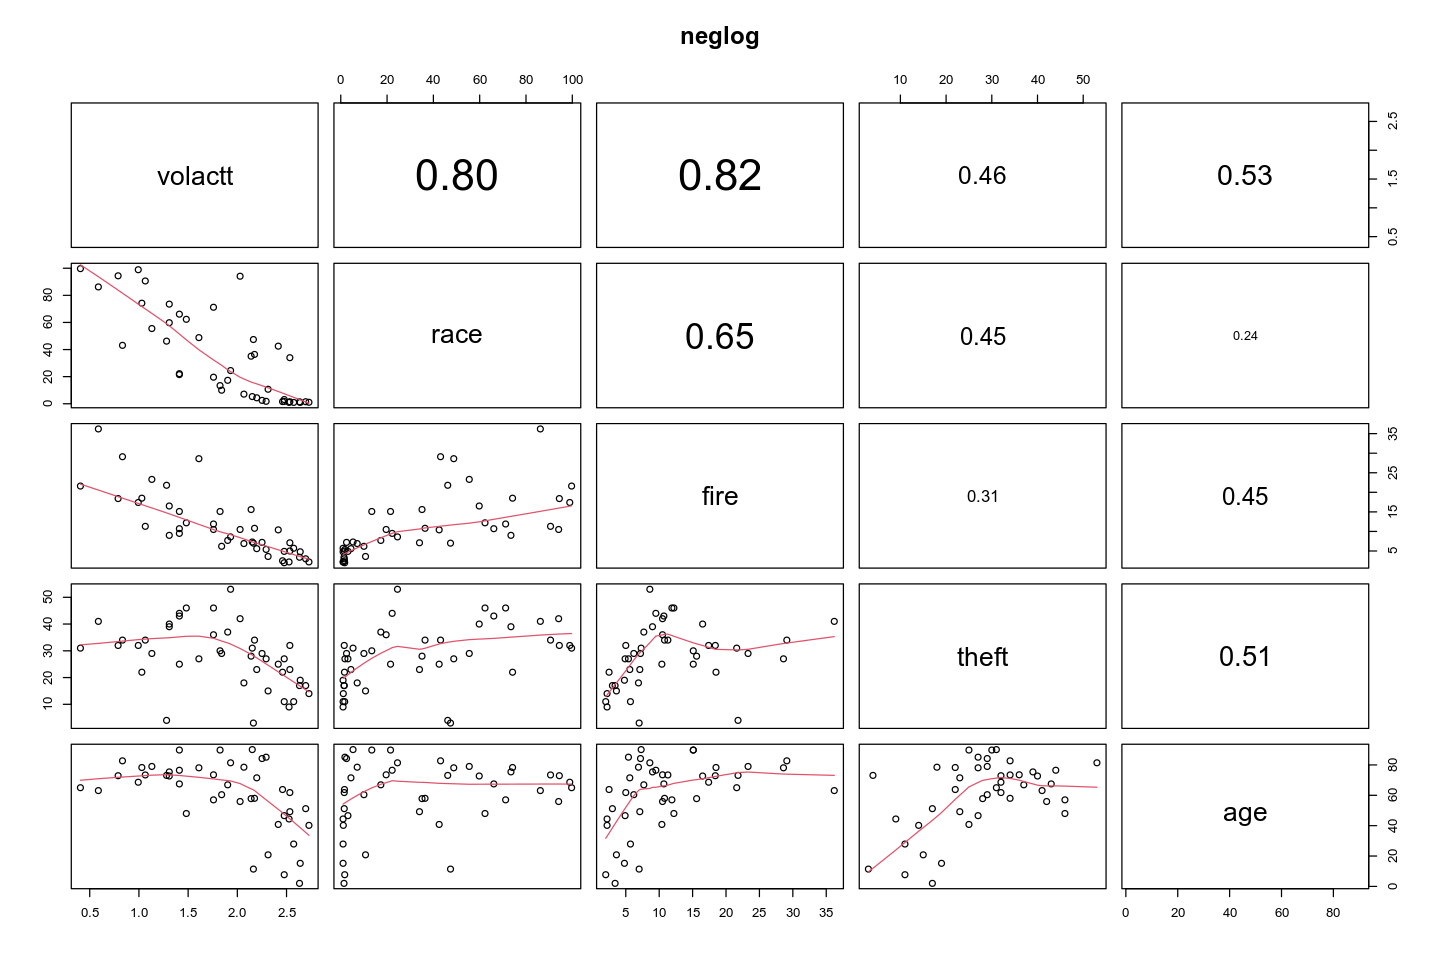

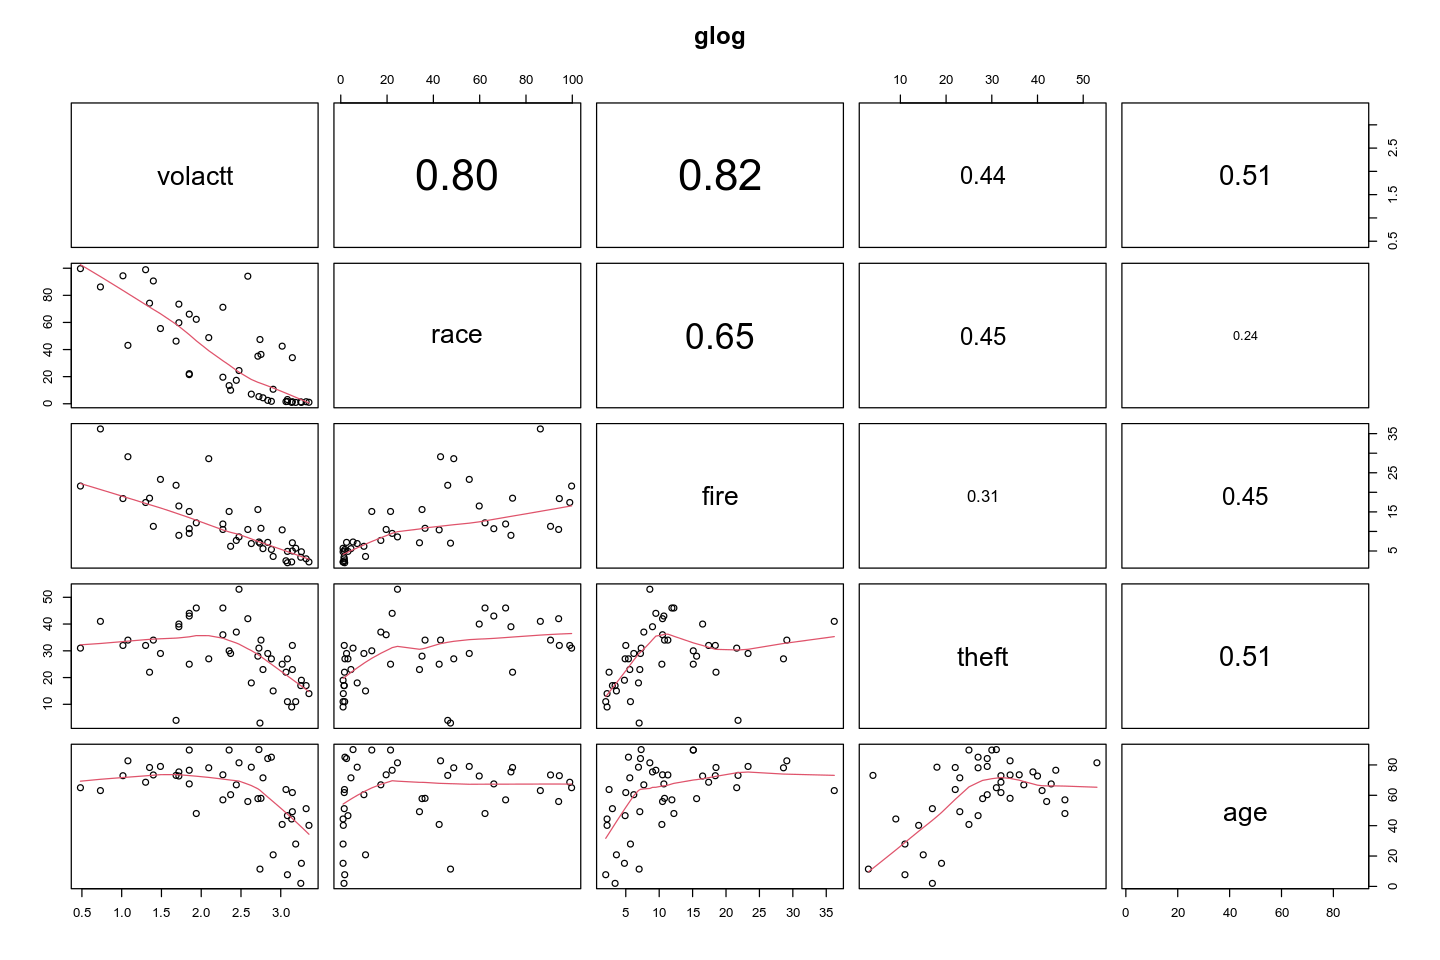

In [47]:
assumptions(model8)

From the tables above  we see that 
* The p-value of Shapiro Wilk test of the untransformed model is $0.66 > 0.05$. So we conclude that at 5% level of significance the normality assumption of residuals holds
* The p-value of Brusch Pagan test of the untransformed model is  $0.31 > 0.05$. Hence at 5% level of significance the homoscedasticity assumtion of residuals also holds

**Let's now visualise the above results graphically**

60633 60626 
   43     1

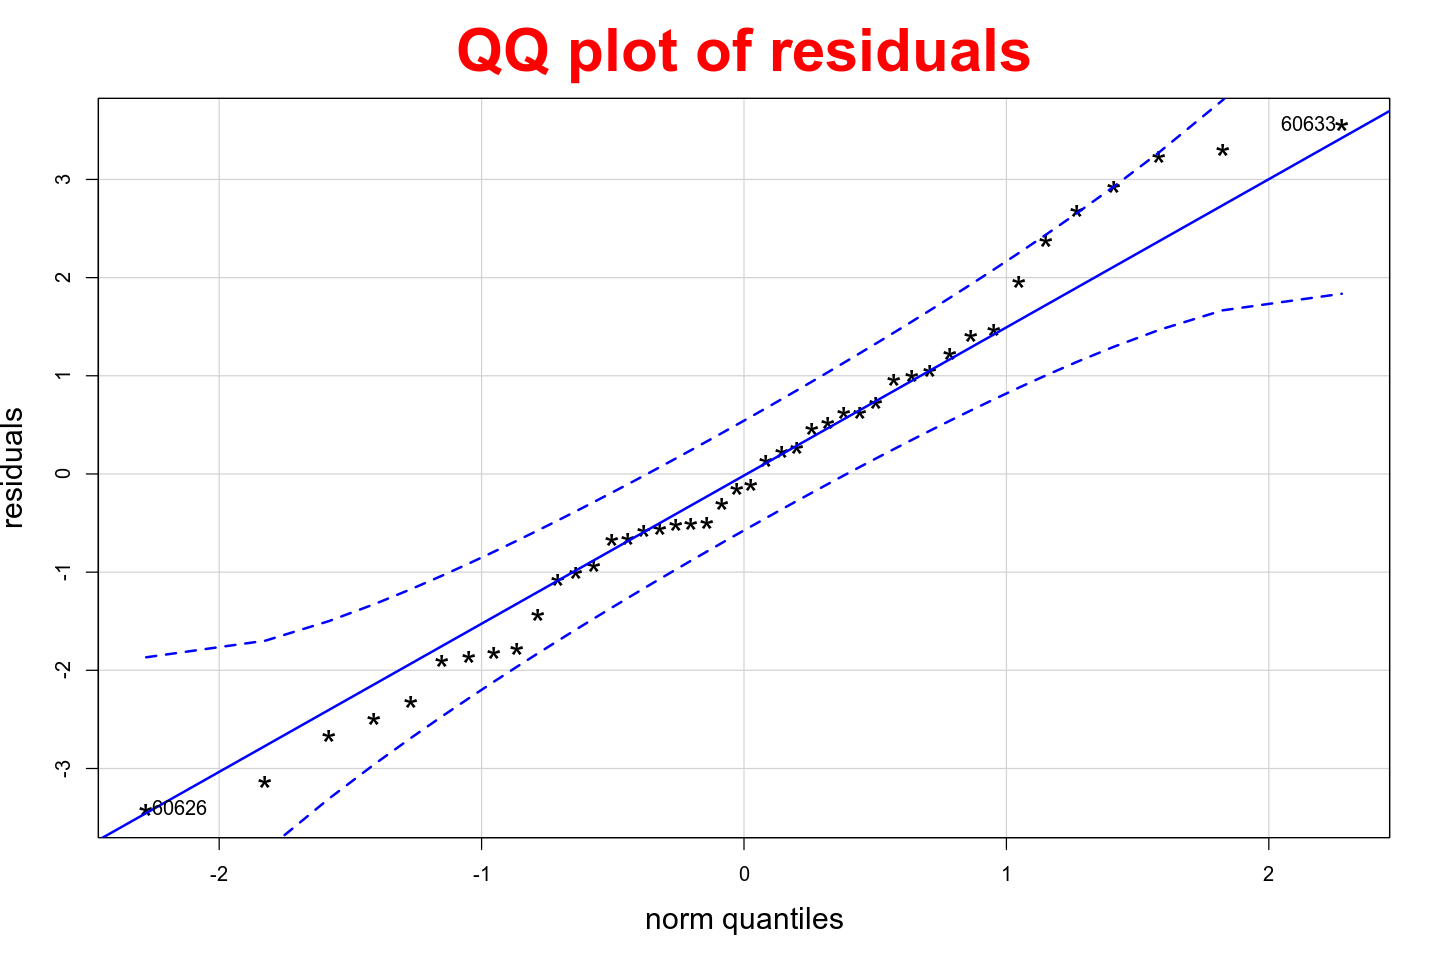

In [48]:
qqPlot(model8$residuals,ylab=list("residuals",cex=1.5),xlab=list("norm quantiles",cex=1.5), pch = '*' , cex = 2)
title(main="QQ plot of residuals",cex.main=3,col.main="red") 

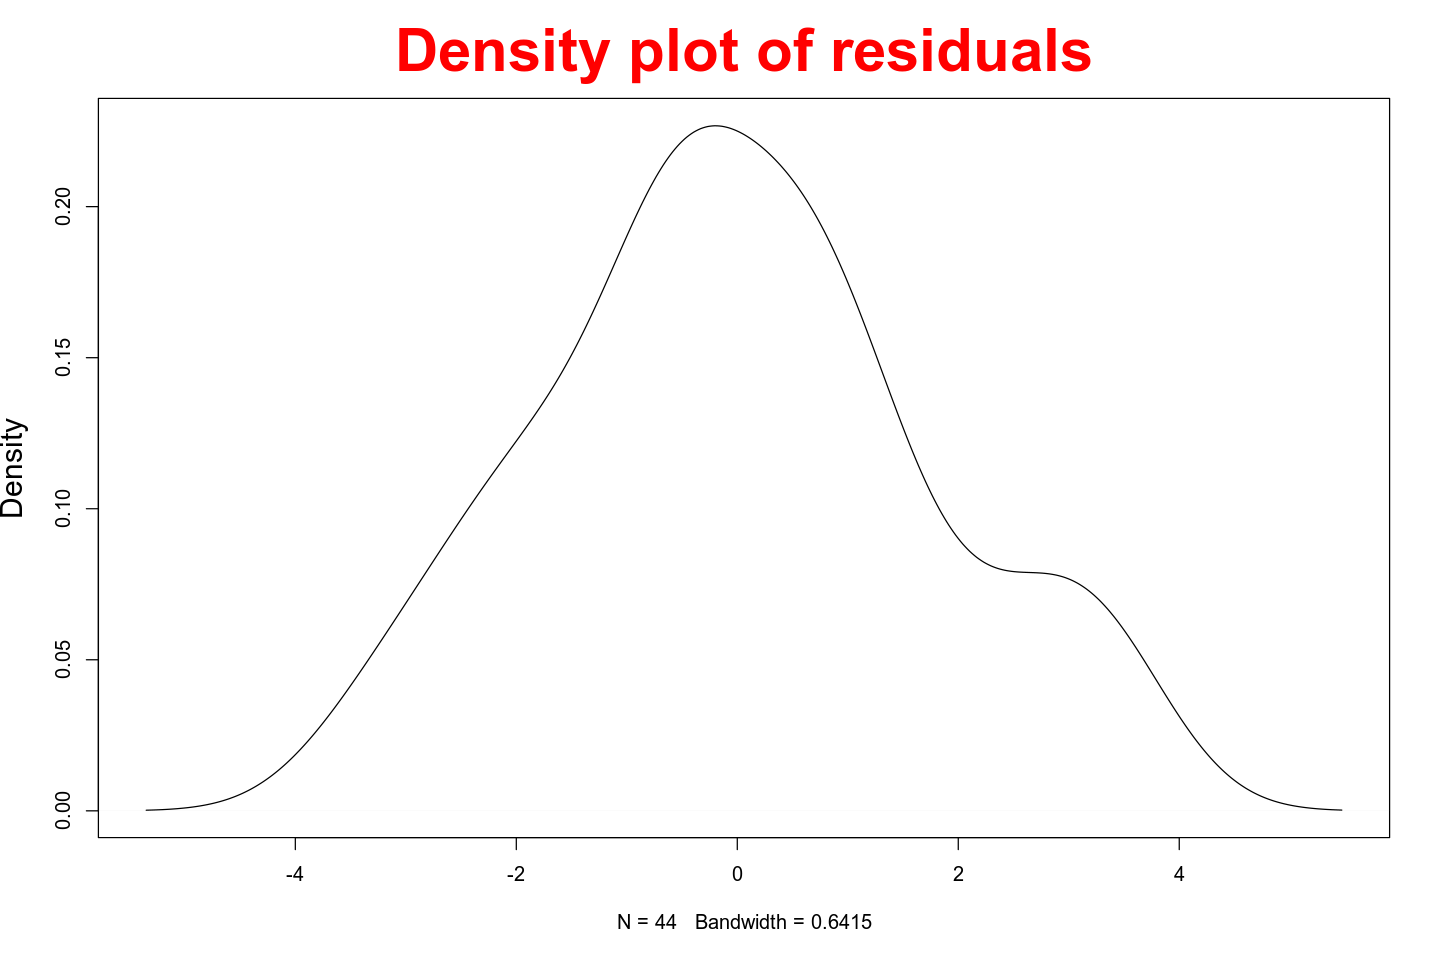

In [49]:
plot(density(model8$residuals),main='',ylab=list('Density',cex=1.5))
title(main="Density plot of residuals",cex.main=3,col.main="red") 

## 2.5 Model adequecy checking

** Now we will observe the relationship between the response and each regressor through component plus residual plots of each regressor.A partial residual plot essentially attempts to model the residuals of one predictor against the dependent variable. A component residual plot adds a line indicating where the line of best fit lies. A significant difference between the residual line and the component line indicates that the predictor does not have a linear relationship with the dependent variable.**

In [51]:
ols_coll_diag(model8)

Tolerance and Variance Inflation Factor
---------------------------------------
  Variables Tolerance      VIF
1      race 0.4703842 2.125922
2      fire 0.4626454 2.161483
3     theft 0.6072034 1.646894
4       age 0.6002690 1.665920


Eigenvalue and Condition Index
------------------------------
  Eigenvalue Condition Index   intercept        race        fire       theft
1 4.36823402        1.000000 0.004810840 0.008874523 0.006914746 0.004209317
2 0.37161683        3.428509 0.046154980 0.316374772 0.048066235 0.014471971
3 0.14513362        5.486166 0.004485981 0.321512577 0.607167104 0.103661440
4 0.06818286        8.004152 0.914780040 0.054801727 0.005363013 0.344748318
5 0.04683267        9.657806 0.029768159 0.298436401 0.332488902 0.532908955
          age
1 0.003560654
2 0.024100489
3 0.015589353
4 0.112094225
5 0.844655280

* Here the VIF values corresponding to each regressors are pretty small(< 5).So we can conclude that multicollinearity is not present among the regressors.

### Checking linearity of each regressores

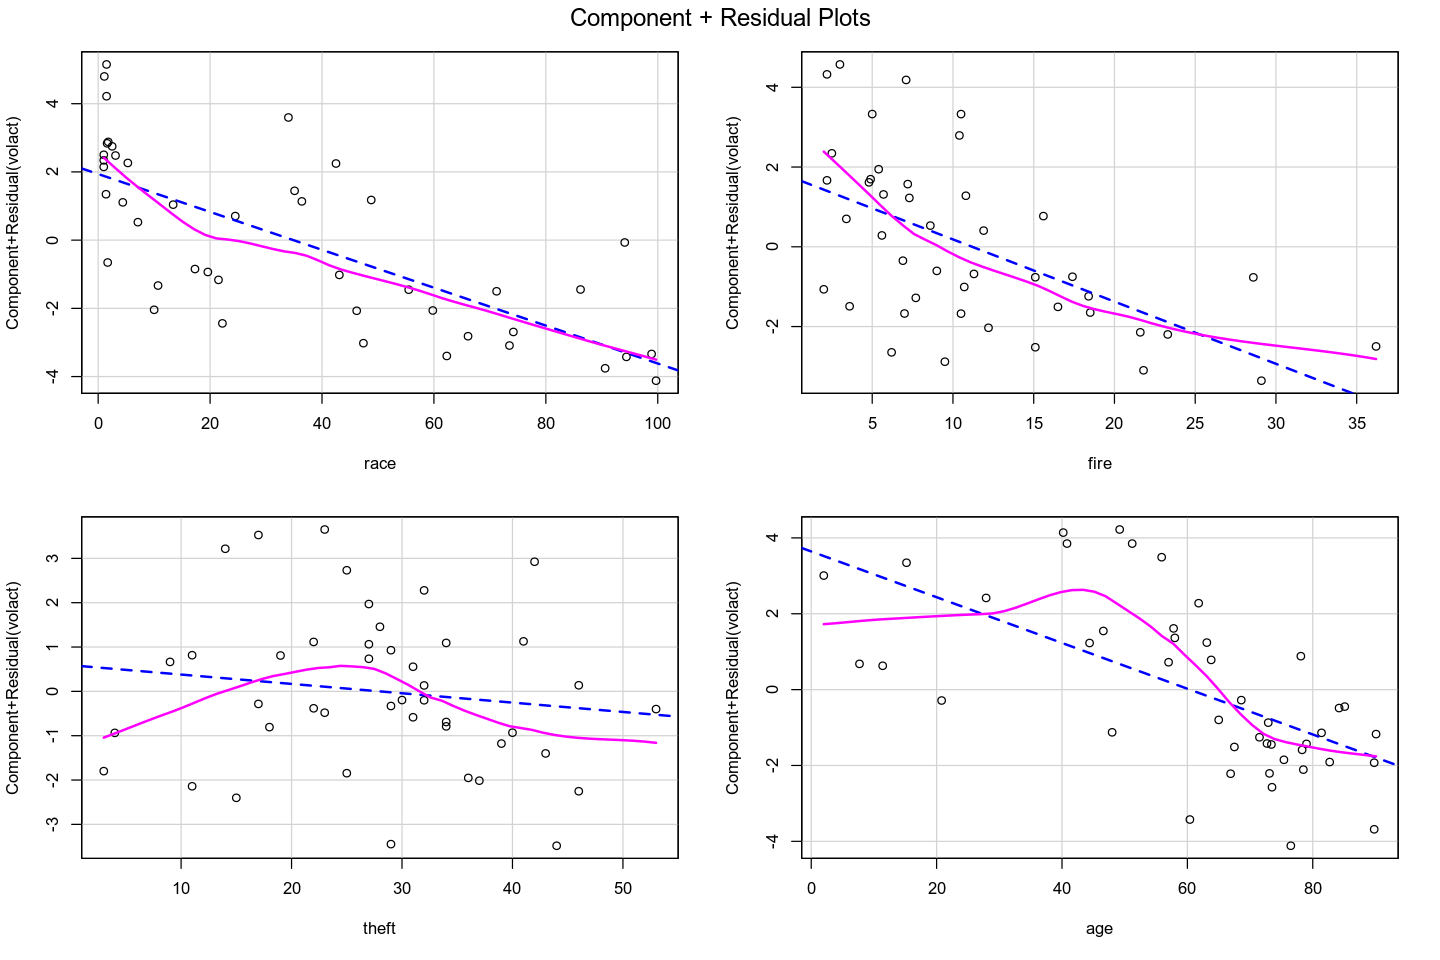

In [50]:
crPlots(model8)

*  We observe that except **theft** and **age** all the other regressors are linearly related with the response variable.

### We will now investigate the importance of each regressor for the linear regression model.

In [52]:
print(ols_correlations(model8))

               Correlations                 
-------------------------------------------
Variable    Zero Order    Partial     Part  
-------------------------------------------
race            -0.758     -0.587    -0.310 
fire            -0.770     -0.434    -0.206 
theft           -0.528     -0.109    -0.047 
age             -0.613     -0.523    -0.263 
-------------------------------------------


Let us now look at the result corresponding to **race** variable.
* Here we can observe that there is a high negative zero order correlation between **race** and **involact**.So more the racial composition in percent minority less the chane of acceptance of new insuarance or renewals by the volantary market.
* the partial correlation between **race** and **response** is also moderate.
* the part correlation is also significant.

#### Hence ,the result of the second part of the analysis also shows clear evidence of the fact that 'race' is a significant factor for non acceptance of new insuarance or renewals.

# 3. Conclusion

###  From the analysis we observe that the claim made by several community organisations that insurance companies were redlining their neighbourhoods i.e. cancelling policies, refusing to insure or to renew is actually true